In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
from oe_acute import pyMNE

In [2]:
os.nice(1)

1

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_32x32_32/enc_train_32.npy')
stim_resp = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_32x32_32/resp_train_32.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((51357, 32), (51357, 214, 32))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=32, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 32

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((51357, 32), (51357, 214))

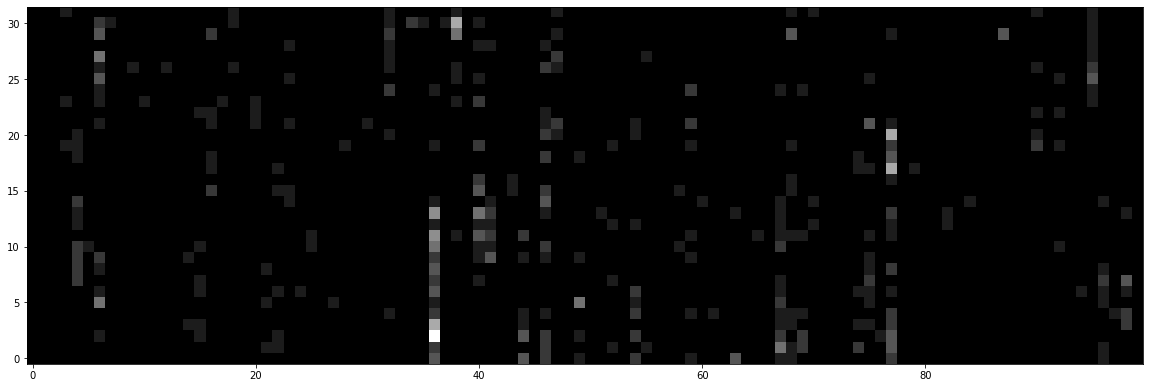

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 20, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/temporal_model/stim_resp_32x32_32/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 32
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.136608
    2       0    0.134971
    3       0    0.134056
    4       0    0.132864
    5       0    0.131964
    6       0    0.131565
    7       0    0.130463
    8       0    0.129696
    9       0    0.129282
   10       0    0.129356
   11       1    0.128519
   12       0    0.128443
   13       0    0.128106
   14       0    0.127989
   15       0    0.127553
   16       0    0.127474
   17       0    0.127192
   18       0    0.127080
   19       0    0.126868
   20       0    0.126931
   21       1    0.126611
   22       0    0.126480
   23       0    0.126558
   24       1    0.126419
   25       0    0.126468
   26       1    0.126541
   27       2    0.126426
   28       3    0.126316
   29       0    0.126362
   30       1    0.126326
   31       2    0.126183
   32       0    0.126221
   33       1    0.126228
   34       2    0.126134
   35       0    0.126168
   36       1    0.126157
   37       2    0.126100
   38       

   32       1    0.143144
   33       2    0.143152
   34       3    0.143178
   35       4    0.143148
   36       5    0.143098
   37       0    0.143064
   38       0    0.143083
   39       1    0.142935
   40       0    0.142699
   41       0    0.142751
   42       1    0.142765
   43       2    0.142699
   44       0    0.142680
   45       0    0.142690
   46       1    0.142680
   47       2    0.142765
   48       3    0.142785
   49       4    0.142694
   50       5    0.142697
   51       6    0.142707
   52       7    0.142708
   53       8    0.142692
   54       9    0.142664
   55       0    0.142691
   56       1    0.142717
   57       2    0.142671
   58       3    0.142656
   59       0    0.142689
   60       1    0.142715
   61       2    0.142699
   62       3    0.142671
   63       4    0.142684
   64       5    0.142653
   65       0    0.142658
   66       1    0.142654
   67       2    0.142674
   68       3    0.142679
   69       4    0.142669
   70       

   18       0    0.102860
   19       0    0.102822
   20       0    0.102822
   21       0    0.102808
   22       0    0.102872
   23       1    0.102804
   24       0    0.102794
   25       0    0.102791
   26       0    0.102822
   27       1    0.102792
   28       2    0.102803
   29       3    0.102844
   30       4    0.102849
   31       5    0.102789
   32       0    0.102770
   33       0    0.102732
   34       0    0.102720
   35       0    0.102750
   36       1    0.102746
   37       2    0.102729
   38       3    0.102724
   39       4    0.102699
   40       0    0.102693
   41       0    0.102708
   42       1    0.102716
   43       2    0.102696
   44       3    0.102671
   45       0    0.102671
   46       1    0.102673
   47       2    0.102685
   48       3    0.102692
   49       4    0.102679
   50       5    0.102657
   51       0    0.102654
   52       0    0.102637
   53       0    0.102643
   54       1    0.102640
   55       2    0.102628
   56       

   29       5    0.098473
   30       0    0.098408
   31       0    0.098408
   32       1    0.098371
   33       0    0.098335
   34       0    0.098339
   35       1    0.098344
   36       2    0.098317
   37       0    0.098333
   38       1    0.098334
   39       2    0.098308
   40       0    0.098301
   41       0    0.098252
   42       0    0.098235
   43       0    0.098237
   44       1    0.098213
   45       0    0.098221
   46       1    0.098214
   47       2    0.098225
   48       3    0.098180
   49       0    0.098185
   50       1    0.098174
   51       0    0.098194
   52       1    0.098204
   53       2    0.098186
   54       3    0.098179
   55       4    0.098190
   56       5    0.098185
   57       6    0.098173
   58       0    0.098172
   59       0    0.098179
   60       1    0.098178
   61       2    0.098177
   62       3    0.098175
   63       4    0.098202
   64       5    0.098207
   65       6    0.098211
   66       7    0.098221
   67       

    1       0    0.198639
    2       0    0.196973
    3       0    0.195510
    4       0    0.194586
    5       0    0.194272
    6       0    0.193718
    7       0    0.192647
    8       0    0.192283
    9       0    0.191886
   10       0    0.191550
   11       0    0.191430
   12       0    0.191309
   13       0    0.191272
   14       0    0.191199
   15       0    0.191202
   16       1    0.191220
   17       2    0.191143
   18       0    0.191114
   19       0    0.191037
   20       0    0.191027
   21       0    0.190881
   22       0    0.190859
   23       0    0.190836
   24       0    0.190916
   25       1    0.190986
   26       2    0.191018
   27       3    0.191057
   28       4    0.191078
   29       5    0.191057
   30       6    0.191006
   31       7    0.190976
   32       8    0.190924
   33       9    0.190902
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.073708
    2       0    0.072915
    3       0    0.072373
    4       

   41       1    0.095038
   42       2    0.095030
   43       3    0.095055
   44       4    0.095085
   45       5    0.095100
   46       6    0.095120
   47       7    0.095110
   48       8    0.095103
   49       9    0.095097
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.100109
    2       0    0.099130
    3       0    0.098043
    4       0    0.097520
    5       0    0.096737
    6       0    0.096108
    7       0    0.095681
    8       0    0.095617
    9       0    0.095294
   10       0    0.095075
   11       0    0.094820
   12       0    0.094658
   13       0    0.094564
   14       0    0.094507
   15       0    0.094418
   16       0    0.094375
   17       0    0.094384
   18       1    0.094315
   19       0    0.094267
   20       0    0.094168
   21       0    0.094124
   22       0    0.094092
   23       0    0.094097
   24       1    0.094098
   25       2    0.094092
   26       3    0.094065
   27       0    0.094061
   28       

    5       0    0.116173
    6       0    0.114768
    7       0    0.114533
    8       0    0.114315
    9       0    0.114217
   10       0    0.113934
   11       0    0.113447
   12       0    0.113088
   13       0    0.112736
   14       0    0.112481
   15       0    0.112211
   16       0    0.112148
   17       0    0.111965
   18       0    0.111784
   19       0    0.111744
   20       0    0.111607
   21       0    0.111593
   22       0    0.111519
   23       0    0.111643
   24       1    0.111598
   25       2    0.111252
   26       0    0.111147
   27       0    0.111056
   28       0    0.111051
   29       0    0.111028
   30       0    0.111053
   31       1    0.111020
   32       0    0.110952
   33       0    0.110920
   34       0    0.110937
   35       1    0.110992
   36       2    0.110964
   37       3    0.110888
   38       0    0.110909
   39       1    0.110897
   40       2    0.110891
   41       3    0.110875
   42       0    0.110896
   43       

  112       6    0.119345
  113       0    0.119342
  114       0    0.119338
  115       0    0.119336
  116       0    0.119341
  117       1    0.119340
  118       2    0.119341
  119       3    0.119339
  120       4    0.119332
  121       0    0.119335
  122       1    0.119335
  123       2    0.119325
  124       0    0.119327
  125       1    0.119329
  126       2    0.119335
  127       3    0.119332
  128       4    0.119327
  129       5    0.119327
  130       6    0.119329
  131       7    0.119328
  132       8    0.119329
  133       9    0.119329
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.125996
    2       0    0.123516
    3       0    0.122392
    4       0    0.122113
    5       0    0.121594
    6       0    0.120692
    7       0    0.120385
    8       0    0.120166
    9       0    0.120069
   10       0    0.119939
   11       0    0.119609
   12       0    0.119261
   13       0    0.119144
   14       0    0.119222
   15       

   17       0    0.154409
   18       0    0.154349
   19       0    0.154254
   20       0    0.154211
   21       0    0.154209
   22       0    0.154227
   23       1    0.154204
   24       0    0.154194
   25       0    0.154246
   26       1    0.154152
   27       0    0.154115
   28       0    0.154156
   29       1    0.154072
   30       0    0.154033
   31       0    0.153993
   32       0    0.153964
   33       0    0.153946
   34       0    0.153946
   35       1    0.153915
   36       0    0.153879
   37       0    0.153878
   38       0    0.153886
   39       1    0.153903
   40       2    0.153873
   41       0    0.153835
   42       0    0.153818
   43       0    0.153814
   44       0    0.153793
   45       0    0.153781
   46       0    0.153782
   47       1    0.153782
   48       2    0.153786
   49       3    0.153780
   50       0    0.153764
   51       0    0.153762
   52       0    0.153756
   53       0    0.153732
   54       0    0.153731
   55       

   55       2    0.290006
   56       3    0.290012
   57       4    0.289987
   58       0    0.289950
   59       0    0.289956
   60       1    0.289959
   61       2    0.289942
   62       0    0.289950
   63       1    0.289959
   64       2    0.289945
   65       3    0.289940
   66       0    0.289945
   67       1    0.289928
   68       0    0.289914
   69       0    0.289926
   70       1    0.289901
   71       0    0.289880
   72       0    0.289878
   73       0    0.289879
   74       1    0.289864
   75       0    0.289876
   76       1    0.289882
   77       2    0.289872
   78       3    0.289866
   79       4    0.289869
   80       5    0.289874
   81       6    0.289865
   82       7    0.289829
   83       0    0.289878
   84       1    0.289897
   85       2    0.289823
   86       0    0.289788
   87       0    0.289787
   88       0    0.289770
   89       0    0.289765
   90       0    0.289768
   91       1    0.289760
   92       0    0.289755
   93       

   89       4    0.101840
   90       5    0.101842
   91       6    0.101836
   92       0    0.101843
   93       1    0.101832
   94       0    0.101831
   95       0    0.101823
   96       0    0.101827
   97       1    0.101831
   98       2    0.101834
   99       3    0.101819
  100       0    0.101815
  101       0    0.101812
  102       0    0.101822
  103       1    0.101820
  104       2    0.101824
  105       3    0.101820
  106       4    0.101828
  107       5    0.101824
  108       6    0.101819
  109       7    0.101813
  110       8    0.101823
  111       9    0.101827
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.105298
    2       0    0.103858
    3       0    0.103118
    4       0    0.101727
    5       0    0.100773
    6       0    0.100589
    7       0    0.100525
    8       0    0.100394
    9       0    0.100430
   10       1    0.100413
   11       2    0.099783
   12       0    0.099687
   13       0    0.099605
   14       

   27       8    0.038151
   28       9    0.038142
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.169505
    2       0    0.168335
    3       0    0.167801
    4       0    0.167325
    5       0    0.167104
    6       0    0.166818
    7       0    0.166630
    8       0    0.166360
    9       0    0.166291
   10       0    0.166108
   11       0    0.166038
   12       0    0.165917
   13       0    0.165896
   14       0    0.165819
   15       0    0.165667
   16       0    0.165626
   17       0    0.165589
   18       0    0.165505
   19       0    0.165518
   20       1    0.165456
   21       0    0.165392
   22       0    0.165405
   23       1    0.165273
   24       0    0.165204
   25       0    0.165187
   26       0    0.165195
   27       1    0.165184
   28       0    0.165198
   29       1    0.165177
   30       0    0.165183
   31       1    0.165154
   32       0    0.165152
   33       0    0.165128
   34       0    0.165150
   35       

   32       3    0.612111
   33       4    0.612079
   34       5    0.612080
   35       6    0.612066
   36       7    0.612078
   37       8    0.612084
   38       9    0.612096
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.616716
    2       0    0.616173
    3       0    0.615300
    4       0    0.614713
    5       0    0.614338
    6       0    0.614034
    7       0    0.613899
    8       0    0.613850
    9       0    0.613729
   10       0    0.613662
   11       0    0.613584
   12       0    0.613459
   13       0    0.613302
   14       0    0.613210
   15       0    0.613131
   16       0    0.613098
   17       0    0.613076
   18       0    0.613053
   19       0    0.613050
   20       0    0.613061
   21       1    0.613068
   22       2    0.613066
   23       3    0.613040
   24       0    0.613034
   25       0    0.613013
   26       0    0.613009
   27       0    0.613019
   28       1    0.613018
   29       2    0.612987
   30       

    3       0    0.599368
    4       0    0.598504
    5       0    0.597356
    6       0    0.596922
    7       0    0.596515
    8       0    0.596063
    9       0    0.595798
   10       0    0.595529
   11       0    0.594683
   12       0    0.594473
   13       0    0.594356
   14       0    0.594153
   15       0    0.594088
   16       0    0.594046
   17       0    0.594064
   18       1    0.593969
   19       0    0.593807
   20       0    0.593781
   21       0    0.593688
   22       0    0.593569
   23       0    0.593553
   24       0    0.593543
   25       0    0.593568
   26       1    0.593600
   27       2    0.593384
   28       0    0.593363
   29       0    0.593322
   30       0    0.593247
   31       0    0.593228
   32       0    0.593256
   33       1    0.593304
   34       2    0.593285
   35       3    0.593278
   36       4    0.593253
   37       5    0.593271
   38       6    0.593292
   39       7    0.593264
   40       8    0.593239
   41       

   64       0    0.133397
   65       0    0.133391
   66       0    0.133379
   67       0    0.133371
   68       0    0.133373
   69       1    0.133373
   70       2    0.133380
   71       3    0.133374
   72       4    0.133370
   73       0    0.133373
   74       1    0.133374
   75       2    0.133372
   76       3    0.133370
   77       0    0.133368
   78       0    0.133369
   79       1    0.133371
   80       2    0.133373
   81       3    0.133373
   82       4    0.133361
   83       0    0.133369
   84       1    0.133364
   85       2    0.133360
   86       0    0.133359
   87       0    0.133351
   88       0    0.133354
   89       1    0.133357
   90       2    0.133356
   91       3    0.133350
   92       0    0.133352
   93       1    0.133351
   94       2    0.133347
   95       0    0.133346
   96       0    0.133344
   97       0    0.133345
   98       1    0.133346
   99       2    0.133341
  100       0    0.133338
  101       0    0.133336
  102       

   34       1    0.292805
   35       2    0.292759
   36       0    0.292768
   37       1    0.292804
   38       2    0.292786
   39       3    0.292757
   40       0    0.292772
   41       1    0.292767
   42       2    0.292739
   43       0    0.292732
   44       0    0.292764
   45       1    0.292762
   46       2    0.292744
   47       3    0.292743
   48       4    0.292768
   49       5    0.292766
   50       6    0.292734
   51       7    0.292732
   52       8    0.292746
   53       9    0.292748
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.300573
    2       0    0.299763
    3       0    0.298700
    4       0    0.297764
    5       0    0.297194
    6       0    0.296724
    7       0    0.296107
    8       0    0.295867
    9       0    0.295806
   10       0    0.295513
   11       0    0.295421
   12       0    0.295480
   13       1    0.294940
   14       0    0.294673
   15       0    0.294251
   16       0    0.294235
   17       

    3       0    0.422833
    4       0    0.421795
    5       0    0.421254
    6       0    0.421072
    7       0    0.420773
    8       0    0.420529
    9       0    0.420190
   10       0    0.419899
   11       0    0.419567
   12       0    0.419384
   13       0    0.419258
   14       0    0.419088
   15       0    0.419008
   16       0    0.418803
   17       0    0.418773
   18       0    0.418710
   19       0    0.418697
   20       0    0.418583
   21       0    0.418531
   22       0    0.418483
   23       0    0.418423
   24       0    0.418369
   25       0    0.418215
   26       0    0.418163
   27       0    0.418123
   28       0    0.418123
   29       1    0.418111
   30       0    0.418076
   31       0    0.418059
   32       0    0.418062
   33       1    0.418044
   34       0    0.418008
   35       0    0.417987
   36       0    0.418000
   37       1    0.417991
   38       2    0.417977
   39       0    0.417948
   40       0    0.417942
   41       

   24       2    0.225229
   25       3    0.225179
   26       4    0.225231
   27       5    0.225183
   28       6    0.225126
   29       0    0.225153
   30       1    0.225096
   31       0    0.225058
   32       0    0.225032
   33       0    0.224978
   34       0    0.224950
   35       0    0.224959
   36       1    0.224921
   37       0    0.224948
   38       1    0.224912
   39       0    0.224934
   40       1    0.224881
   41       0    0.224857
   42       0    0.224823
   43       0    0.224884
   44       1    0.224880
   45       2    0.224954
   46       3    0.224970
   47       4    0.224984
   48       5    0.224952
   49       6    0.224939
   50       7    0.224926
   51       8    0.224909
   52       9    0.224916
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.238275
    2       0    0.236593
    3       0    0.236377
    4       0    0.234682
    5       0    0.234420
    6       0    0.233703
    7       0    0.233384
    8       

   31       2    0.132840
   32       0    0.132831
   33       0    0.132843
   34       1    0.132837
   35       2    0.132796
   36       0    0.132766
   37       0    0.132770
   38       1    0.132764
   39       0    0.132789
   40       1    0.132823
   41       2    0.132788
   42       3    0.132769
   43       4    0.132779
   44       5    0.132754
   45       0    0.132739
   46       0    0.132755
   47       1    0.132779
   48       2    0.132769
   49       3    0.132755
   50       4    0.132732
   51       0    0.132721
   52       0    0.132727
   53       1    0.132717
   54       0    0.132719
   55       1    0.132705
   56       0    0.132707
   57       1    0.132714
   58       2    0.132712
   59       3    0.132719
   60       4    0.132717
   61       5    0.132713
   62       6    0.132714
   63       7    0.132721
   64       8    0.132725
   65       9    0.132718
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.136649
    2       

   46       2    0.094800
   47       3    0.094821
   48       4    0.094829
   49       5    0.094802
   50       6    0.094804
   51       7    0.094811
   52       8    0.094806
   53       9    0.094799
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.097116
    2       0    0.095282
    3       0    0.093802
    4       0    0.093746
    5       0    0.093294
    6       0    0.092446
    7       0    0.092193
    8       0    0.092079
    9       0    0.092017
   10       0    0.091747
   11       0    0.091635
   12       0    0.091576
   13       0    0.091506
   14       0    0.091504
   15       0    0.091382
   16       0    0.091308
   17       0    0.091058
   18       0    0.090984
   19       0    0.090937
   20       0    0.090958
   21       1    0.090974
   22       2    0.090914
   23       0    0.090916
   24       1    0.090865
   25       0    0.090824
   26       0    0.090844
   27       1    0.090814
   28       0    0.090760
   29       

   12       0    0.565901
   13       0    0.565778
   14       0    0.565584
   15       0    0.565449
   16       0    0.565346
   17       0    0.565267
   18       0    0.565161
   19       0    0.565096
   20       0    0.564945
   21       0    0.564744
   22       0    0.564695
   23       0    0.564671
   24       0    0.564482
   25       0    0.564346
   26       0    0.564296
   27       0    0.564027
   28       0    0.563985
   29       0    0.563969
   30       0    0.563923
   31       0    0.563905
   32       0    0.563898
   33       0    0.563880
   34       0    0.563848
   35       0    0.563838
   36       0    0.563802
   37       0    0.563741
   38       0    0.563678
   39       0    0.563590
   40       0    0.563472
   41       0    0.563419
   42       0    0.563387
   43       0    0.563357
   44       0    0.563318
   45       0    0.563312
   46       0    0.563315
   47       1    0.563265
   48       0    0.563250
   49       0    0.563223
   50       

   16       1    0.146446
   17       0    0.146348
   18       0    0.146316
   19       0    0.146267
   20       0    0.146241
   21       0    0.146229
   22       0    0.146244
   23       1    0.146176
   24       0    0.146150
   25       0    0.146146
   26       0    0.146147
   27       1    0.146114
   28       0    0.146070
   29       0    0.146019
   30       0    0.146007
   31       0    0.146019
   32       1    0.146024
   33       2    0.146003
   34       0    0.145988
   35       0    0.145972
   36       0    0.145970
   37       0    0.145977
   38       1    0.145967
   39       0    0.145955
   40       0    0.145947
   41       0    0.145950
   42       1    0.145950
   43       2    0.145959
   44       3    0.145959
   45       4    0.145942
   46       0    0.145935
   47       0    0.145935
   48       1    0.145937
   49       2    0.145936
   50       3    0.145933
   51       0    0.145935
   52       1    0.145934
   53       2    0.145907
   54       

   35       0    0.047935
   36       0    0.047917
   37       0    0.047913
   38       0    0.047920
   39       1    0.047906
   40       0    0.047902
   41       0    0.047912
   42       1    0.047928
   43       2    0.047932
   44       3    0.047939
   45       4    0.047945
   46       5    0.047929
   47       6    0.047894
   48       0    0.047890
   49       0    0.047892
   50       1    0.047872
   51       0    0.047849
   52       0    0.047854
   53       1    0.047864
   54       2    0.047862
   55       3    0.047852
   56       4    0.047849
   57       0    0.047849
   58       1    0.047855
   59       2    0.047858
   60       3    0.047855
   61       4    0.047853
   62       5    0.047855
   63       6    0.047856
   64       7    0.047857
   65       8    0.047858
   66       9    0.047854
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.054890
    2       0    0.053249
    3       0    0.052945
    4       0    0.052816
    5       

   29       1    0.273677
   30       0    0.273625
   31       0    0.273597
   32       0    0.273555
   33       0    0.273567
   34       1    0.273494
   35       0    0.273502
   36       1    0.273462
   37       0    0.273462
   38       1    0.273441
   39       0    0.273358
   40       0    0.273373
   41       1    0.273353
   42       0    0.273356
   43       1    0.273325
   44       0    0.273338
   45       1    0.273353
   46       2    0.273337
   47       3    0.273339
   48       4    0.273331
   49       5    0.273301
   50       0    0.273303
   51       1    0.273314
   52       2    0.273305
   53       3    0.273309
   54       4    0.273303
   55       5    0.273292
   56       0    0.273267
   57       0    0.273286
   58       1    0.273292
   59       2    0.273284
   60       3    0.273273
   61       4    0.273276
   62       5    0.273266
   63       0    0.273268
   64       1    0.273284
   65       2    0.273278
   66       3    0.273244
   67       

   18       1    0.048815
   19       2    0.048765
   20       3    0.048813
   21       4    0.048823
   22       5    0.048766
   23       6    0.048734
   24       0    0.048764
   25       1    0.048758
   26       2    0.048636
   27       0    0.048687
   28       1    0.048725
   29       2    0.048658
   30       3    0.048675
   31       4    0.048711
   32       5    0.048658
   33       6    0.048648
   34       7    0.048703
   35       8    0.048734
   36       9    0.048742
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.048306
    2       0    0.047718
    3       0    0.047844
    4       1    0.047969
    5       2    0.047442
    6       0    0.047180
    7       0    0.046960
    8       0    0.046831
    9       0    0.046805
   10       0    0.046757
   11       0    0.046787
   12       1    0.046845
   13       2    0.046818
   14       3    0.046811
   15       4    0.046743
   16       0    0.046713
   17       0    0.046782
   18       

   36       1    0.250871
   37       2    0.250858
   38       3    0.250818
   39       0    0.250784
   40       0    0.250716
   41       0    0.250591
   42       0    0.250590
   43       0    0.250630
   44       1    0.250620
   45       2    0.250593
   46       3    0.250572
   47       0    0.250568
   48       0    0.250585
   49       1    0.250589
   50       2    0.250577
   51       3    0.250579
   52       4    0.250592
   53       5    0.250575
   54       6    0.250498
   55       0    0.250433
   56       0    0.250455
   57       1    0.250490
   58       2    0.250505
   59       3    0.250511
   60       4    0.250494
   61       5    0.250456
   62       6    0.250431
   63       0    0.250434
   64       1    0.250457
   65       2    0.250484
   66       3    0.250473
   67       4    0.250441
   68       5    0.250416
   69       0    0.250411
   70       0    0.250337
   71       0    0.250333
   72       0    0.250331
   73       0    0.250379
   74       

  117       0    0.410074
  118       1    0.410074
  119       2    0.410079
  120       3    0.410083
  121       4    0.410084
  122       5    0.410079
  123       6    0.410076
  124       7    0.410079
  125       8    0.410080
  126       9    0.410077
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.427684
    2       0    0.425131
    3       0    0.423148
    4       0    0.421580
    5       0    0.420728
    6       0    0.419781
    7       0    0.419099
    8       0    0.418004
    9       0    0.417768
   10       0    0.416824
   11       0    0.416354
   12       0    0.415883
   13       0    0.415561
   14       0    0.415386
   15       0    0.415141
   16       0    0.415020
   17       0    0.414874
   18       0    0.414637
   19       0    0.414397
   20       0    0.414294
   21       0    0.414100
   22       0    0.414058
   23       0    0.413972
   24       0    0.413893
   25       0    0.413871
   26       0    0.413759
   27       

   39       0    0.061748
   40       0    0.061753
   41       1    0.061762
   42       2    0.061754
   43       3    0.061754
   44       4    0.061769
   45       5    0.061781
   46       6    0.061736
   47       0    0.061729
   48       0    0.061761
   49       1    0.061776
   50       2    0.061765
   51       3    0.061787
   52       4    0.061778
   53       5    0.061764
   54       6    0.061771
   55       7    0.061775
   56       8    0.061757
   57       9    0.061740
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.067494
    2       0    0.065526
    3       0    0.064028
    4       0    0.063428
    5       0    0.062985
    6       0    0.061646
    7       0    0.061485
    8       0    0.060990
    9       0    0.060903
   10       0    0.060475
   11       0    0.060549
   12       1    0.060445
   13       0    0.060377
   14       0    0.060222
   15       0    0.060147
   16       0    0.060085
   17       0    0.059933
   18       

   61       5    0.106777
   62       6    0.106768
   63       7    0.106771
   64       8    0.106773
   65       9    0.106777
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.110229
    2       0    0.109493
    3       0    0.109118
    4       0    0.108762
    5       0    0.108346
    6       0    0.108237
    7       0    0.108196
    8       0    0.107898
    9       0    0.107753
   10       0    0.107710
   11       0    0.107696
   12       0    0.107685
   13       0    0.107506
   14       0    0.107453
   15       0    0.107448
   16       0    0.107480
   17       1    0.107481
   18       2    0.107524
   19       3    0.107532
   20       4    0.107452
   21       5    0.107363
   22       0    0.107391
   23       1    0.107419
   24       2    0.107418
   25       3    0.107399
   26       4    0.107392
   27       5    0.107409
   28       6    0.107423
   29       7    0.107429
   30       8    0.107442
   31       9    0.107413
minimum of t

   43       0    0.111153
   44       0    0.111168
   45       1    0.111135
   46       0    0.111052
   47       0    0.111076
   48       1    0.111068
   49       2    0.111025
   50       0    0.111017
   51       0    0.111041
   52       1    0.111039
   53       2    0.111063
   54       3    0.111032
   55       4    0.111052
   56       5    0.111053
   57       6    0.111043
   58       7    0.111052
   59       8    0.111045
   60       9    0.111055
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.123521
    2       0    0.121631
    3       0    0.121199
    4       0    0.119903
    5       0    0.119687
    6       0    0.118821
    7       0    0.118227
    8       0    0.117998
    9       0    0.117879
   10       0    0.117709
   11       0    0.117324
   12       0    0.117026
   13       0    0.116903
   14       0    0.116948
   15       1    0.116706
   16       0    0.116604
   17       0    0.116337
   18       0    0.116327
   19       

   21       0    0.232225
   22       0    0.232128
   23       0    0.232138
   24       1    0.232022
   25       0    0.231923
   26       0    0.231848
   27       0    0.231840
   28       0    0.231767
   29       0    0.231728
   30       0    0.231780
   31       1    0.231739
   32       2    0.231632
   33       0    0.231538
   34       0    0.231553
   35       1    0.231546
   36       2    0.231510
   37       0    0.231483
   38       0    0.231458
   39       0    0.231470
   40       1    0.231466
   41       2    0.231454
   42       0    0.231460
   43       1    0.231446
   44       0    0.231394
   45       0    0.231384
   46       0    0.231398
   47       1    0.231413
   48       2    0.231278
   49       0    0.231258
   50       0    0.231285
   51       1    0.231236
   52       0    0.231220
   53       0    0.231225
   54       1    0.231301
   55       2    0.231291
   56       3    0.231279
   57       4    0.231280
   58       5    0.231268
   59       

   41       0    0.585881
   42       0    0.585869
   43       0    0.585803
   44       0    0.585779
   45       0    0.585766
   46       0    0.585734
   47       0    0.585720
   48       0    0.585717
   49       0    0.585703
   50       0    0.585698
   51       0    0.585701
   52       1    0.585697
   53       0    0.585697
   54       1    0.585703
   55       2    0.585703
   56       3    0.585704
   57       4    0.585700
   58       5    0.585706
   59       6    0.585706
   60       7    0.585725
   61       8    0.585722
   62       9    0.585729
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.595711
    2       0    0.593608
    3       0    0.592061
    4       0    0.591246
    5       0    0.590045
    6       0    0.589531
    7       0    0.588115
    8       0    0.587907
    9       0    0.587686
   10       0    0.587089
   11       0    0.586866
   12       0    0.586345
   13       0    0.586112
   14       0    0.586010
   15       

    9       0    0.198948
   10       0    0.198901
   11       0    0.198696
   12       0    0.198538
   13       0    0.198575
   14       1    0.198545
   15       2    0.198374
   16       0    0.198313
   17       0    0.198299
   18       0    0.198238
   19       0    0.198231
   20       0    0.198120
   21       0    0.198073
   22       0    0.198130
   23       1    0.198131
   24       2    0.198058
   25       0    0.198003
   26       0    0.198009
   27       1    0.197992
   28       0    0.197932
   29       0    0.197944
   30       1    0.197981
   31       2    0.197959
   32       3    0.197932
   33       0    0.197962
   34       1    0.197872
   35       0    0.198069
   36       1    0.198077
   37       2    0.198081
   38       3    0.198068
   39       4    0.198061
   40       5    0.198004
   41       6    0.197996
   42       7    0.197891
   43       8    0.197833
   44       0    0.197767
   45       0    0.197771
   46       1    0.197763
   47       

   18       2    0.132036
   19       0    0.131942
   20       0    0.131957
   21       1    0.131924
   22       0    0.131805
   23       0    0.131830
   24       1    0.131795
   25       0    0.131660
   26       0    0.131651
   27       0    0.131641
   28       0    0.131582
   29       0    0.131575
   30       0    0.131608
   31       1    0.131636
   32       2    0.131640
   33       3    0.131640
   34       4    0.131626
   35       5    0.131634
   36       6    0.131656
   37       7    0.131629
   38       8    0.131605
   39       9    0.131635
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.659579
    2       0    0.657490
    3       0    0.657120
    4       0    0.656361
    5       0    0.656193
    6       0    0.655950
    7       0    0.655776
    8       0    0.655634
    9       0    0.655523
   10       0    0.655249
   11       0    0.655006
   12       0    0.654901
   13       0    0.654824
   14       0    0.654800
   15       

   87       7    0.655485
   88       8    0.655492
   89       9    0.655490
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.660011
    2       0    0.657972
    3       0    0.657540
    4       0    0.656559
    5       0    0.656038
    6       0    0.655912
    7       0    0.655562
    8       0    0.655479
    9       0    0.655371
   10       0    0.655270
   11       0    0.655168
   12       0    0.655120
   13       0    0.654974
   14       0    0.654925
   15       0    0.654833
   16       0    0.654805
   17       0    0.654788
   18       0    0.654762
   19       0    0.654728
   20       0    0.654693
   21       0    0.654685
   22       0    0.654668
   23       0    0.654605
   24       0    0.654582
   25       0    0.654558
   26       0    0.654521
   27       0    0.654493
   28       0    0.654491
   29       0    0.654495
   30       1    0.654479
   31       0    0.654471
   32       0    0.654458
   33       0    0.654457
   34       

   18       0    0.106058
   19       0    0.105980
   20       0    0.105974
   21       0    0.105886
   22       0    0.105813
   23       0    0.105817
   24       1    0.105796
   25       0    0.105769
   26       0    0.105781
   27       1    0.105777
   28       2    0.105758
   29       0    0.105766
   30       1    0.105755
   31       0    0.105728
   32       0    0.105741
   33       1    0.105745
   34       2    0.105725
   35       0    0.105709
   36       0    0.105679
   37       0    0.105662
   38       0    0.105654
   39       0    0.105665
   40       1    0.105654
   41       0    0.105645
   42       0    0.105656
   43       1    0.105649
   44       2    0.105607
   45       0    0.105596
   46       0    0.105605
   47       1    0.105600
   48       2    0.105601
   49       3    0.105588
   50       0    0.105594
   51       1    0.105588
   52       2    0.105582
   53       0    0.105587
   54       1    0.105581
   55       0    0.105571
   56       

   25       0    0.575605
   26       0    0.575485
   27       0    0.575438
   28       0    0.575458
   29       1    0.575392
   30       0    0.575335
   31       0    0.575258
   32       0    0.575295
   33       1    0.575278
   34       2    0.575227
   35       0    0.575226
   36       0    0.575197
   37       0    0.575171
   38       0    0.575169
   39       0    0.575161
   40       0    0.575169
   41       1    0.575158
   42       0    0.575122
   43       0    0.575118
   44       0    0.575129
   45       1    0.575108
   46       0    0.575066
   47       0    0.575008
   48       0    0.574927
   49       0    0.574867
   50       0    0.574853
   51       0    0.574873
   52       1    0.574869
   53       2    0.574836
   54       0    0.574844
   55       1    0.574851
   56       2    0.574864
   57       3    0.574857
   58       4    0.574871
   59       5    0.574832
   60       0    0.574812
   61       0    0.574831
   62       1    0.574842
   63       

   43       1    0.184026
   44       2    0.183937
   45       0    0.183912
   46       0    0.183906
   47       0    0.183860
   48       0    0.183805
   49       0    0.183771
   50       0    0.183738
   51       0    0.183647
   52       0    0.183705
   53       1    0.183713
   54       2    0.183619
   55       0    0.183617
   56       0    0.183620
   57       1    0.183644
   58       2    0.183652
   59       3    0.183653
   60       4    0.183642
   61       5    0.183626
   62       6    0.183635
   63       7    0.183643
   64       8    0.183608
   65       0    0.183586
   66       0    0.183594
   67       1    0.183588
   68       2    0.183575
   69       0    0.183575
   70       0    0.183550
   71       0    0.183541
   72       0    0.183530
   73       0    0.183528
   74       0    0.183502
   75       0    0.183494
   76       0    0.183494
   77       1    0.183464
   78       0    0.183409
   79       0    0.183260
   80       0    0.183228
   81       

  114       0    0.187617
  115       1    0.187616
  116       2    0.187620
  117       3    0.187621
  118       4    0.187626
  119       5    0.187629
  120       6    0.187622
  121       7    0.187627
  122       8    0.187635
  123       9    0.187641
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.155505
    2       0    0.151697
    3       0    0.151020
    4       0    0.149665
    5       0    0.149108
    6       0    0.148341
    7       0    0.147896
    8       0    0.147004
    9       0    0.146834
   10       0    0.146575
   11       0    0.146533
   12       0    0.146362
   13       0    0.146354
   14       0    0.146295
   15       0    0.146058
   16       0    0.146073
   17       1    0.146007
   18       0    0.146071
   19       1    0.145823
   20       0    0.145825
   21       1    0.145852
   22       2    0.145541
   23       0    0.145610
   24       1    0.145687
   25       2    0.145718
   26       3    0.145633
   27       

   59       0    0.181521
   60       0    0.181522
   61       1    0.181543
   62       2    0.181565
   63       3    0.181540
   64       4    0.181508
   65       0    0.181508
   66       1    0.181498
   67       0    0.181490
   68       0    0.181479
   69       0    0.181479
   70       0    0.181483
   71       1    0.181484
   72       2    0.181479
   73       0    0.181476
   74       0    0.181487
   75       1    0.181485
   76       2    0.181486
   77       3    0.181493
   78       4    0.181484
   79       5    0.181469
   80       0    0.181451
   81       0    0.181443
   82       0    0.181441
   83       0    0.181445
   84       1    0.181445
   85       2    0.181443
   86       3    0.181445
   87       4    0.181448
   88       5    0.181441
   89       0    0.181437
   90       0    0.181441
   91       1    0.181443
   92       2    0.181440
   93       3    0.181442
   94       4    0.181438
   95       5    0.181437
   96       0    0.181439
   97       

   43       0    0.144908
   44       1    0.144939
   45       2    0.144898
   46       3    0.144888
   47       0    0.144906
   48       1    0.144890
   49       2    0.144870
   50       0    0.144884
   51       1    0.144873
   52       2    0.144888
   53       3    0.144868
   54       0    0.144910
   55       1    0.144904
   56       2    0.144923
   57       3    0.144928
   58       4    0.144967
   59       5    0.144972
   60       6    0.144947
   61       7    0.144968
   62       8    0.144933
   63       9    0.144937
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.151077
    2       0    0.150116
    3       0    0.149347
    4       0    0.148137
    5       0    0.146877
    6       0    0.146322
    7       0    0.145903
    8       0    0.145509
    9       0    0.145137
   10       0    0.144884
   11       0    0.144581
   12       0    0.144308
   13       0    0.144158
   14       0    0.144043
   15       0    0.144012
   16       

   26       1    0.458732
   27       0    0.458679
   28       0    0.458667
   29       0    0.458594
   30       0    0.458575
   31       0    0.458587
   32       1    0.458584
   33       2    0.458554
   34       0    0.458533
   35       0    0.458518
   36       0    0.458484
   37       0    0.458470
   38       0    0.458453
   39       0    0.458454
   40       1    0.458457
   41       2    0.458416
   42       0    0.458346
   43       0    0.458328
   44       0    0.458338
   45       1    0.458330
   46       2    0.458329
   47       3    0.458333
   48       4    0.458307
   49       0    0.458294
   50       0    0.458299
   51       1    0.458305
   52       2    0.458294
   53       3    0.458273
   54       0    0.458260
   55       0    0.458265
   56       1    0.458240
   57       0    0.458221
   58       0    0.458224
   59       1    0.458222
   60       2    0.458211
   61       0    0.458204
   62       0    0.458208
   63       1    0.458208
   64       

  153       0    0.444535
  154       0    0.444534
  155       0    0.444534
  156       0    0.444536
  157       1    0.444537
  158       2    0.444538
  159       3    0.444538
  160       4    0.444538
  161       5    0.444539
  162       6    0.444539
  163       7    0.444540
  164       8    0.444541
  165       9    0.444541
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.456569
    2       0    0.454061
    3       0    0.452174
    4       0    0.450976
    5       0    0.450807
    6       0    0.449754
    7       0    0.449364
    8       0    0.448174
    9       0    0.447207
   10       0    0.446797
   11       0    0.446794
   12       0    0.446712
   13       0    0.446406
   14       0    0.446177
   15       0    0.446030
   16       0    0.445977
   17       0    0.445929
   18       0    0.445734
   19       0    0.445587
   20       0    0.445522
   21       0    0.445529
   22       1    0.445504
   23       0    0.445491
   24       

  130       1    0.445752
  131       2    0.445756
  132       3    0.445748
  133       0    0.445744
  134       0    0.445726
  135       0    0.445720
  136       0    0.445716
  137       0    0.445713
  138       0    0.445711
  139       0    0.445713
  140       1    0.445714
  141       2    0.445714
  142       3    0.445713
  143       4    0.445713
  144       5    0.445713
  145       6    0.445713
  146       7    0.445713
  147       8    0.445713
  148       9    0.445713
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.635445
    2       0    0.633192
    3       0    0.632626
    4       0    0.631211
    5       0    0.630332
    6       0    0.630005
    7       0    0.629352
    8       0    0.629172
    9       0    0.628806
   10       0    0.628690
   11       0    0.628567
   12       0    0.628343
   13       0    0.628164
   14       0    0.628108
   15       0    0.628040
   16       0    0.627867
   17       0    0.627594
   18       

   61       0    0.624808
   62       0    0.624817
   63       1    0.624832
   64       2    0.624830
   65       3    0.624825
   66       4    0.624822
   67       5    0.624806
   68       0    0.624803
   69       0    0.624805
   70       1    0.624798
   71       0    0.624799
   72       1    0.624787
   73       0    0.624787
   74       0    0.624786
   75       0    0.624781
   76       0    0.624781
   77       0    0.624774
   78       0    0.624764
   79       0    0.624764
   80       1    0.624764
   81       2    0.624759
   82       0    0.624752
   83       0    0.624751
   84       0    0.624743
   85       0    0.624741
   86       0    0.624743
   87       1    0.624743
   88       2    0.624743
   89       3    0.624742
   90       4    0.624747
   91       5    0.624747
   92       6    0.624744
   93       7    0.624745
   94       8    0.624745
   95       9    0.624744
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.157937
    2       

   25       0    0.152141
   26       0    0.152118
   27       0    0.152038
   28       0    0.151984
   29       0    0.151958
   30       0    0.151895
   31       0    0.151753
   32       0    0.151742
   33       0    0.151714
   34       0    0.151718
   35       1    0.151688
   36       0    0.151668
   37       0    0.151643
   38       0    0.151626
   39       0    0.151598
   40       0    0.151584
   41       0    0.151546
   42       0    0.151530
   43       0    0.151516
   44       0    0.151505
   45       0    0.151500
   46       0    0.151483
   47       0    0.151480
   48       0    0.151481
   49       1    0.151478
   50       0    0.151471
   51       0    0.151445
   52       0    0.151424
   53       0    0.151419
   54       0    0.151407
   55       0    0.151382
   56       0    0.151364
   57       0    0.151344
   58       0    0.151328
   59       0    0.151328
   60       1    0.151319
   61       0    0.151309
   62       0    0.151307
   63       

    5       0    0.518223
    6       0    0.517983
    7       0    0.517207
    8       0    0.515456
    9       0    0.515021
   10       0    0.514073
   11       0    0.513464
   12       0    0.513379
   13       0    0.512830
   14       0    0.512454
   15       0    0.512463
   16       1    0.512085
   17       0    0.511820
   18       0    0.511547
   19       0    0.511485
   20       0    0.511192
   21       0    0.511114
   22       0    0.511182
   23       1    0.511067
   24       0    0.510960
   25       0    0.510993
   26       1    0.510922
   27       0    0.510783
   28       0    0.510750
   29       0    0.510815
   30       1    0.510633
   31       0    0.510539
   32       0    0.510525
   33       0    0.510538
   34       1    0.510457
   35       0    0.510325
   36       0    0.510382
   37       1    0.510384
   38       2    0.510099
   39       0    0.510021
   40       0    0.510034
   41       1    0.510044
   42       2    0.509988
   43       

   31       0    0.511649
   32       0    0.511567
   33       0    0.511388
   34       0    0.511098
   35       0    0.511106
   36       1    0.511038
   37       0    0.511018
   38       0    0.511036
   39       1    0.511018
   40       2    0.510992
   41       0    0.511006
   42       1    0.510961
   43       0    0.510921
   44       0    0.510942
   45       1    0.510933
   46       2    0.510933
   47       3    0.510919
   48       0    0.510890
   49       0    0.510880
   50       0    0.510891
   51       1    0.510858
   52       0    0.510758
   53       0    0.510744
   54       0    0.510699
   55       0    0.510551
   56       0    0.510565
   57       1    0.510573
   58       2    0.510514
   59       0    0.510509
   60       0    0.510518
   61       1    0.510484
   62       0    0.510534
   63       1    0.510558
   64       2    0.510515
   65       3    0.510478
   66       0    0.510409
   67       0    0.510414
   68       1    0.510402
   69       

   91       0    0.383550
   92       0    0.383537
   93       0    0.383532
   94       0    0.383537
   95       1    0.383535
   96       2    0.383528
   97       0    0.383536
   98       1    0.383548
   99       2    0.383541
  100       3    0.383541
  101       4    0.383526
  102       0    0.383520
  103       0    0.383525
  104       1    0.383529
  105       2    0.383524
  106       3    0.383521
  107       4    0.383526
  108       5    0.383525
  109       6    0.383520
  110       0    0.383518
  111       0    0.383521
  112       1    0.383522
  113       2    0.383523
  114       3    0.383527
  115       4    0.383511
  116       0    0.383510
  117       0    0.383517
  118       1    0.383515
  119       2    0.383510
  120       3    0.383511
  121       4    0.383514
  122       5    0.383505
  123       0    0.383497
  124       0    0.383501
  125       1    0.383509
  126       2    0.383505
  127       3    0.383492
  128       0    0.383494
  129       

   61       9    0.124522
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.134865
    2       0    0.131000
    3       0    0.129694
    4       0    0.127252
    5       0    0.126063
    6       0    0.125413
    7       0    0.125441
    8       1    0.125039
    9       0    0.124604
   10       0    0.123771
   11       0    0.123811
   12       1    0.123569
   13       0    0.123285
   14       0    0.123128
   15       0    0.122794
   16       0    0.122681
   17       0    0.122456
   18       0    0.122502
   19       1    0.122317
   20       0    0.122142
   21       0    0.122101
   22       0    0.122117
   23       1    0.121886
   24       0    0.121808
   25       0    0.121988
   26       1    0.122008
   27       2    0.121684
   28       0    0.121600
   29       0    0.121671
   30       1    0.121545
   31       0    0.121366
   32       0    0.121418
   33       1    0.121236
   34       0    0.121382
   35       1    0.121242
   36       

   64       3    0.036847
   65       4    0.036852
   66       5    0.036843
   67       0    0.036845
   68       1    0.036835
   69       0    0.036832
   70       0    0.036829
   71       0    0.036810
   72       0    0.036809
   73       0    0.036798
   74       0    0.036789
   75       0    0.036798
   76       1    0.036792
   77       2    0.036796
   78       3    0.036810
   79       4    0.036800
   80       5    0.036807
   81       6    0.036820
   82       7    0.036807
   83       8    0.036814
   84       9    0.036811
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.043951
    2       0    0.042211
    3       0    0.041204
    4       0    0.040798
    5       0    0.040406
    6       0    0.039992
    7       0    0.039744
    8       0    0.039588
    9       0    0.039325
   10       0    0.039062
   11       0    0.038943
   12       0    0.038807
   13       0    0.038677
   14       0    0.038534
   15       0    0.038498
   16       

   36       1    0.182334
   37       2    0.182342
   38       3    0.182330
   39       4    0.182321
   40       5    0.182324
   41       6    0.182315
   42       7    0.182285
   43       0    0.182270
   44       0    0.182289
   45       1    0.182285
   46       2    0.182274
   47       3    0.182264
   48       0    0.182263
   49       0    0.182265
   50       1    0.182263
   51       2    0.182251
   52       0    0.182237
   53       0    0.182232
   54       0    0.182238
   55       1    0.182220
   56       0    0.182214
   57       0    0.182210
   58       0    0.182200
   59       0    0.182199
   60       0    0.182211
   61       1    0.182208
   62       2    0.182203
   63       3    0.182206
   64       4    0.182207
   65       5    0.182199
   66       0    0.182196
   67       0    0.182195
   68       0    0.182202
   69       1    0.182195
   70       2    0.182193
   71       0    0.182191
   72       0    0.182190
   73       0    0.182190
   74       

   36       0    0.458522
   37       0    0.458492
   38       0    0.458480
   39       0    0.458435
   40       0    0.458399
   41       0    0.458376
   42       0    0.458370
   43       0    0.458340
   44       0    0.458321
   45       0    0.458265
   46       0    0.458215
   47       0    0.458044
   48       0    0.458007
   49       0    0.457927
   50       0    0.457845
   51       0    0.457788
   52       0    0.457692
   53       0    0.457663
   54       0    0.457665
   55       1    0.457679
   56       2    0.457659
   57       0    0.457596
   58       0    0.457571
   59       0    0.457582
   60       1    0.457584
   61       2    0.457606
   62       3    0.457561
   63       0    0.457517
   64       0    0.457474
   65       0    0.457456
   66       0    0.457453
   67       0    0.457439
   68       0    0.457417
   69       0    0.457412
   70       0    0.457395
   71       0    0.457389
   72       0    0.457390
   73       1    0.457347
   74       

   11       0    0.324380
   12       0    0.324389
   13       1    0.323978
   14       0    0.323644
   15       0    0.323549
   16       0    0.323417
   17       0    0.323220
   18       0    0.323132
   19       0    0.323154
   20       1    0.323065
   21       0    0.322778
   22       0    0.322217
   23       0    0.322072
   24       0    0.322048
   25       0    0.322022
   26       0    0.321899
   27       0    0.321675
   28       0    0.321569
   29       0    0.321558
   30       0    0.321441
   31       0    0.321364
   32       0    0.321311
   33       0    0.321394
   34       1    0.321341
   35       2    0.321225
   36       0    0.321199
   37       0    0.321087
   38       0    0.321080
   39       0    0.321131
   40       1    0.321079
   41       0    0.320877
   42       0    0.320839
   43       0    0.320778
   44       0    0.320806
   45       1    0.320820
   46       2    0.320698
   47       0    0.320628
   48       0    0.320640
   49       

   54       0    0.313433
   55       0    0.313392
   56       0    0.313385
   57       0    0.313364
   58       0    0.313352
   59       0    0.313362
   60       1    0.313358
   61       2    0.313339
   62       0    0.313318
   63       0    0.313321
   64       1    0.313291
   65       0    0.313252
   66       0    0.313222
   67       0    0.313182
   68       0    0.313127
   69       0    0.313087
   70       0    0.313088
   71       1    0.313067
   72       0    0.313053
   73       0    0.313052
   74       0    0.313060
   75       1    0.313063
   76       2    0.313069
   77       3    0.313074
   78       4    0.313063
   79       5    0.313057
   80       6    0.313057
   81       7    0.313053
   82       8    0.313023
   83       0    0.313008
   84       0    0.313019
   85       1    0.313016
   86       2    0.313049
   87       3    0.313059
   88       4    0.313028
   89       5    0.313021
   90       6    0.312984
   91       0    0.312972
   92       

   30       0    0.085110
   31       0    0.085103
   32       0    0.085077
   33       0    0.085047
   34       0    0.085068
   35       1    0.085037
   36       0    0.085019
   37       0    0.085021
   38       1    0.085030
   39       2    0.085023
   40       3    0.085021
   41       4    0.085014
   42       0    0.084997
   43       0    0.084958
   44       0    0.084962
   45       1    0.084973
   46       2    0.084955
   47       0    0.084945
   48       0    0.084987
   49       1    0.085007
   50       2    0.084978
   51       3    0.084939
   52       0    0.084951
   53       1    0.084956
   54       2    0.084936
   55       0    0.084936
   56       1    0.084938
   57       2    0.084935
   58       0    0.084952
   59       1    0.084954
   60       2    0.084949
   61       3    0.084961
   62       4    0.084976
   63       5    0.084987
   64       6    0.084978
   65       7    0.084962
   66       8    0.084968
   67       9    0.084976
minimum of t

    5       0    0.349565
    6       0    0.349423
    7       0    0.349185
    8       0    0.348734
    9       0    0.348409
   10       0    0.347939
   11       0    0.347737
   12       0    0.347587
   13       0    0.347532
   14       0    0.347389
   15       0    0.347258
   16       0    0.347183
   17       0    0.347113
   18       0    0.347080
   19       0    0.347053
   20       0    0.347022
   21       0    0.346877
   22       0    0.346705
   23       0    0.346657
   24       0    0.346632
   25       0    0.346628
   26       0    0.346588
   27       0    0.346582
   28       0    0.346568
   29       0    0.346509
   30       0    0.346547
   31       1    0.346600
   32       2    0.346504
   33       0    0.346429
   34       0    0.346421
   35       0    0.346386
   36       0    0.346309
   37       0    0.346271
   38       0    0.346254
   39       0    0.346242
   40       0    0.346253
   41       1    0.346255
   42       2    0.346238
   43       

   74       0    0.663377
   75       1    0.663379
   76       2    0.663373
   77       3    0.663373
   78       4    0.663374
   79       5    0.663368
   80       6    0.663365
   81       7    0.663363
   82       0    0.663369
   83       1    0.663372
   84       2    0.663371
   85       3    0.663370
   86       4    0.663373
   87       5    0.663374
   88       6    0.663371
   89       7    0.663371
   90       8    0.663374
   91       9    0.663374
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.672613
    2       0    0.670023
    3       0    0.668465
    4       0    0.667530
    5       0    0.667055
    6       0    0.666300
    7       0    0.665810
    8       0    0.665647
    9       0    0.665475
   10       0    0.665047
   11       0    0.664610
   12       0    0.664482
   13       0    0.664279
   14       0    0.664237
   15       0    0.664184
   16       0    0.664063
   17       0    0.664036
   18       0    0.663979
   19       

    1       0    0.418914
    2       0    0.417807
    3       0    0.417351
    4       0    0.416783
    5       0    0.416236
    6       0    0.416127
    7       0    0.415402
    8       0    0.415115
    9       0    0.414959
   10       0    0.414833
   11       0    0.414821
   12       0    0.414661
   13       0    0.414554
   14       0    0.414304
   15       0    0.414158
   16       0    0.414089
   17       0    0.413902
   18       0    0.413890
   19       0    0.413887
   20       0    0.413871
   21       0    0.413837
   22       0    0.413802
   23       0    0.413799
   24       0    0.413794
   25       0    0.413822
   26       1    0.413840
   27       2    0.413778
   28       0    0.413692
   29       0    0.413617
   30       0    0.413533
   31       0    0.413498
   32       0    0.413506
   33       1    0.413505
   34       2    0.413521
   35       3    0.413529
   36       4    0.413531
   37       5    0.413538
   38       6    0.413519
   39       

   37       0    0.217651
   38       0    0.217557
   39       0    0.217504
   40       0    0.217466
   41       0    0.217450
   42       0    0.217418
   43       0    0.217427
   44       1    0.217423
   45       2    0.217420
   46       3    0.217454
   47       4    0.217443
   48       5    0.217417
   49       0    0.217394
   50       0    0.217358
   51       0    0.217346
   52       0    0.217359
   53       1    0.217377
   54       2    0.217379
   55       3    0.217374
   56       4    0.217354
   57       5    0.217353
   58       6    0.217316
   59       0    0.217308
   60       0    0.217312
   61       1    0.217350
   62       2    0.217343
   63       3    0.217323
   64       4    0.217324
   65       5    0.217319
   66       6    0.217323
   67       7    0.217329
   68       8    0.217325
   69       9    0.217321
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.225374
    2       0    0.224124
    3       0    0.222419
    4       

   70       1    0.203990
   71       0    0.203989
   72       0    0.203983
   73       0    0.203995
   74       1    0.203995
   75       2    0.203964
   76       0    0.203966
   77       1    0.203976
   78       2    0.203968
   79       3    0.203963
   80       0    0.203960
   81       0    0.203962
   82       1    0.203973
   83       2    0.203976
   84       3    0.203964
   85       4    0.203954
   86       0    0.203962
   87       1    0.203956
   88       2    0.203948
   89       0    0.203950
   90       1    0.203937
   91       0    0.203931
   92       0    0.203934
   93       1    0.203927
   94       0    0.203914
   95       0    0.203912
   96       0    0.203904
   97       0    0.203907
   98       1    0.203900
   99       0    0.203895
  100       0    0.203898
  101       1    0.203903
  102       2    0.203883
  103       0    0.203877
  104       0    0.203883
  105       1    0.203881
  106       2    0.203880
  107       3    0.203883
  108       

    4       0    0.494485
    5       0    0.492944
    6       0    0.492292
    7       0    0.491669
    8       0    0.490845
    9       0    0.490631
   10       0    0.490370
   11       0    0.490197
   12       0    0.490024
   13       0    0.489810
   14       0    0.489295
   15       0    0.488858
   16       0    0.488364
   17       0    0.487829
   18       0    0.487800
   19       0    0.487764
   20       0    0.487648
   21       0    0.487516
   22       0    0.487471
   23       0    0.487406
   24       0    0.487345
   25       0    0.487285
   26       0    0.487239
   27       0    0.487206
   28       0    0.487167
   29       0    0.487085
   30       0    0.487016
   31       0    0.486940
   32       0    0.486908
   33       0    0.486892
   34       0    0.486799
   35       0    0.486624
   36       0    0.486506
   37       0    0.486472
   38       0    0.486414
   39       0    0.486350
   40       0    0.486255
   41       0    0.486242
   42       

   17       0    0.483788
   18       0    0.483684
   19       0    0.483587
   20       0    0.483450
   21       0    0.483261
   22       0    0.483117
   23       0    0.483051
   24       0    0.482879
   25       0    0.482811
   26       0    0.482777
   27       0    0.482714
   28       0    0.482652
   29       0    0.482603
   30       0    0.482504
   31       0    0.482473
   32       0    0.482363
   33       0    0.482313
   34       0    0.482277
   35       0    0.482272
   36       0    0.482270
   37       0    0.482261
   38       0    0.482242
   39       0    0.482230
   40       0    0.482211
   41       0    0.482212
   42       1    0.482184
   43       0    0.482104
   44       0    0.482063
   45       0    0.482038
   46       0    0.482038
   47       0    0.482033
   48       0    0.481991
   49       0    0.481965
   50       0    0.481940
   51       0    0.481933
   52       0    0.481930
   53       0    0.481911
   54       0    0.481883
   55       

  157       9    0.484928
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.083284
    2       0    0.082296
    3       0    0.081488
    4       0    0.080942
    5       0    0.080490
    6       0    0.080327
    7       0    0.080144
    8       0    0.079696
    9       0    0.079516
   10       0    0.079229
   11       0    0.079157
   12       0    0.079118
   13       0    0.079073
   14       0    0.079056
   15       0    0.078987
   16       0    0.078852
   17       0    0.078845
   18       0    0.078817
   19       0    0.078691
   20       0    0.078611
   21       0    0.078607
   22       0    0.078598
   23       0    0.078581
   24       0    0.078576
   25       0    0.078540
   26       0    0.078500
   27       0    0.078497
   28       0    0.078457
   29       0    0.078400
   30       0    0.078377
   31       0    0.078415
   32       1    0.078457
   33       2    0.078375
   34       0    0.078379
   35       1    0.078379
   36       

   19       0    0.514601
   20       1    0.514563
   21       0    0.514531
   22       0    0.514428
   23       0    0.514362
   24       0    0.514261
   25       0    0.514125
   26       0    0.514047
   27       0    0.513991
   28       0    0.513996
   29       1    0.513929
   30       0    0.513917
   31       0    0.513956
   32       1    0.513938
   33       2    0.513907
   34       0    0.513811
   35       0    0.513819
   36       1    0.513798
   37       0    0.513700
   38       0    0.513648
   39       0    0.513651
   40       1    0.513637
   41       0    0.513656
   42       1    0.513645
   43       2    0.513629
   44       0    0.513606
   45       0    0.513612
   46       1    0.513629
   47       2    0.513612
   48       3    0.513588
   49       0    0.513574
   50       0    0.513588
   51       1    0.513586
   52       2    0.513542
   53       0    0.513446
   54       0    0.513399
   55       0    0.513317
   56       0    0.513332
   57       

   55       0    0.513160
   56       0    0.513148
   57       0    0.513137
   58       0    0.513135
   59       0    0.513136
   60       1    0.513136
   61       2    0.513135
   62       0    0.513136
   63       1    0.513137
   64       2    0.513134
   65       0    0.513120
   66       0    0.513114
   67       0    0.513105
   68       0    0.513099
   69       0    0.513100
   70       1    0.513100
   71       2    0.513095
   72       0    0.513091
   73       0    0.513087
   74       0    0.513082
   75       0    0.513080
   76       0    0.513080
   77       1    0.513082
   78       2    0.513086
   79       3    0.513082
   80       4    0.513075
   81       0    0.513069
   82       0    0.513067
   83       0    0.513065
   84       0    0.513064
   85       0    0.513063
   86       0    0.513062
   87       0    0.513062
   88       1    0.513061
   89       0    0.513048
   90       0    0.513043
   91       0    0.513036
   92       0    0.513032
   93       

   60       0    0.643236
   61       0    0.643240
   62       1    0.643185
   63       0    0.643169
   64       0    0.643151
   65       0    0.643158
   66       1    0.643151
   67       0    0.643158
   68       1    0.643148
   69       0    0.643135
   70       0    0.643143
   71       1    0.643140
   72       2    0.643158
   73       3    0.643134
   74       0    0.643128
   75       0    0.643079
   76       0    0.643048
   77       0    0.643070
   78       1    0.643051
   79       2    0.643010
   80       0    0.643002
   81       0    0.643009
   82       1    0.643016
   83       2    0.642999
   84       0    0.642951
   85       0    0.642948
   86       0    0.642938
   87       0    0.642938
   88       0    0.642935
   89       0    0.642925
   90       0    0.642911
   91       0    0.642920
   92       1    0.642901
   93       0    0.642880
   94       0    0.642882
   95       1    0.642866
   96       0    0.642844
   97       0    0.642848
   98       

   51       1    0.642458
   52       0    0.642436
   53       0    0.642440
   54       1    0.642367
   55       0    0.642316
   56       0    0.642309
   57       0    0.642278
   58       0    0.642266
   59       0    0.642285
   60       1    0.642286
   61       2    0.642268
   62       3    0.642264
   63       0    0.642221
   64       0    0.642221
   65       0    0.642187
   66       0    0.642226
   67       1    0.642241
   68       2    0.642227
   69       3    0.642246
   70       4    0.642228
   71       5    0.642172
   72       0    0.642175
   73       1    0.642162
   74       0    0.642148
   75       0    0.642143
   76       0    0.642138
   77       0    0.642132
   78       0    0.642121
   79       0    0.642122
   80       1    0.642107
   81       0    0.642113
   82       1    0.642121
   83       2    0.642117
   84       3    0.642122
   85       4    0.642129
   86       5    0.642118
   87       6    0.642104
   88       0    0.642109
   89       

  139       0    0.300229
  140       1    0.300230
  141       2    0.300230
  142       3    0.300224
  143       4    0.300228
  144       5    0.300228
  145       6    0.300230
  146       7    0.300228
  147       8    0.300233
  148       9    0.300235
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.306456
    2       0    0.304172
    3       0    0.302417
    4       0    0.302117
    5       0    0.300967
    6       0    0.300480
    7       0    0.299946
    8       0    0.299642
    9       0    0.299304
   10       0    0.298077
   11       0    0.297659
   12       0    0.297230
   13       0    0.297096
   14       0    0.296956
   15       0    0.296885
   16       0    0.296763
   17       0    0.296629
   18       0    0.296500
   19       0    0.296455
   20       0    0.296483
   21       1    0.296398
   22       0    0.296327
   23       0    0.296250
   24       0    0.296151
   25       0    0.296058
   26       0    0.296044
   27       

   26       0    0.644702
   27       0    0.644670
   28       0    0.644662
   29       0    0.644561
   30       0    0.644535
   31       0    0.644527
   32       0    0.644524
   33       0    0.644457
   34       0    0.644359
   35       0    0.644341
   36       0    0.644319
   37       0    0.644251
   38       0    0.644242
   39       0    0.644230
   40       0    0.644198
   41       0    0.644189
   42       0    0.644176
   43       0    0.644170
   44       0    0.644180
   45       1    0.644126
   46       0    0.644110
   47       0    0.644044
   48       0    0.644065
   49       1    0.644064
   50       2    0.644035
   51       0    0.643995
   52       0    0.643976
   53       0    0.643970
   54       0    0.643972
   55       1    0.643978
   56       2    0.643972
   57       3    0.643954
   58       0    0.643953
   59       0    0.643955
   60       1    0.643949
   61       0    0.643940
   62       0    0.643931
   63       0    0.643929
   64       

   57       0    0.646664
   58       0    0.646664
   59       0    0.646667
   60       1    0.646659
   61       0    0.646646
   62       0    0.646617
   63       0    0.646617
   64       1    0.646619
   65       2    0.646604
   66       0    0.646585
   67       0    0.646581
   68       0    0.646586
   69       1    0.646582
   70       2    0.646570
   71       0    0.646588
   72       1    0.646596
   73       2    0.646593
   74       3    0.646593
   75       4    0.646576
   76       5    0.646585
   77       6    0.646584
   78       7    0.646589
   79       8    0.646571
   80       9    0.646566
   81       0    0.646557
   82       0    0.646558
   83       1    0.646538
   84       0    0.646531
   85       0    0.646533
   86       1    0.646530
   87       0    0.646525
   88       0    0.646525
   89       0    0.646521
   90       0    0.646514
   91       0    0.646517
   92       1    0.646516
   93       2    0.646512
   94       0    0.646513
   95       

   35       0    0.544317
   36       0    0.544332
   37       1    0.544291
   38       0    0.544263
   39       0    0.544202
   40       0    0.544203
   41       1    0.544129
   42       0    0.544099
   43       0    0.544101
   44       1    0.544071
   45       0    0.544002
   46       0    0.543961
   47       0    0.543973
   48       1    0.544003
   49       2    0.543994
   50       3    0.543949
   51       0    0.543945
   52       0    0.543911
   53       0    0.543896
   54       0    0.543903
   55       1    0.543916
   56       2    0.543909
   57       3    0.543880
   58       0    0.543893
   59       1    0.543888
   60       2    0.543812
   61       0    0.543774
   62       0    0.543711
   63       0    0.543680
   64       0    0.543641
   65       0    0.543619
   66       0    0.543640
   67       1    0.543638
   68       2    0.543624
   69       3    0.543608
   70       0    0.543596
   71       0    0.543594
   72       0    0.543468
   73       

    1       0    0.211953
    2       0    0.210733
    3       0    0.210046
    4       0    0.209481
    5       0    0.209149
    6       0    0.209179
    7       1    0.208666
    8       0    0.208184
    9       0    0.207694
   10       0    0.207499
   11       0    0.207332
   12       0    0.207398
   13       1    0.207243
   14       0    0.207018
   15       0    0.207028
   16       1    0.206959
   17       0    0.206833
   18       0    0.206918
   19       1    0.206978
   20       2    0.206833
   21       3    0.206771
   22       0    0.206804
   23       1    0.206868
   24       2    0.206876
   25       3    0.206773
   26       4    0.206814
   27       5    0.206836
   28       6    0.206647
   29       0    0.206679
   30       1    0.206745
   31       2    0.206681
   32       3    0.206608
   33       0    0.206694
   34       1    0.206724
   35       2    0.206664
   36       3    0.206642
   37       4    0.206664
   38       5    0.206650
   39       

   45       2    0.188238
   46       3    0.188190
   47       4    0.188123
   48       0    0.188123
   49       1    0.188136
   50       2    0.188137
   51       3    0.188141
   52       4    0.188148
   53       5    0.188146
   54       6    0.188130
   55       7    0.188114
   56       0    0.188115
   57       1    0.188140
   58       2    0.188128
   59       3    0.188117
   60       4    0.188124
   61       5    0.188128
   62       6    0.188123
   63       7    0.188120
   64       8    0.188099
   65       0    0.188098
   66       0    0.188123
   67       1    0.188123
   68       2    0.188115
   69       3    0.188105
   70       4    0.188107
   71       5    0.188117
   72       6    0.188123
   73       7    0.188123
   74       8    0.188116
   75       9    0.188117
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.197598
    2       0    0.195801
    3       0    0.193289
    4       0    0.192010
    5       0    0.190639
    6       

   63       0    0.257298
   64       1    0.257306
   65       2    0.257303
   66       3    0.257279
   67       0    0.257277
   68       0    0.257275
   69       0    0.257257
   70       0    0.257213
   71       0    0.257212
   72       0    0.257201
   73       0    0.257183
   74       0    0.257174
   75       0    0.257186
   76       1    0.257188
   77       2    0.257182
   78       3    0.257182
   79       4    0.257181
   80       5    0.257173
   81       0    0.257156
   82       0    0.257135
   83       0    0.257153
   84       1    0.257154
   85       2    0.257161
   86       3    0.257163
   87       4    0.257149
   88       5    0.257144
   89       6    0.257145
   90       7    0.257135
   91       8    0.257130
   92       0    0.257134
   93       1    0.257133
   94       2    0.257130
   95       0    0.257132
   96       1    0.257135
   97       2    0.257131
   98       3    0.257128
   99       0    0.257133
  100       1    0.257130
  101       

   20       0    0.372739
   21       0    0.372641
   22       0    0.372568
   23       0    0.372515
   24       0    0.372530
   25       1    0.372538
   26       2    0.372490
   27       0    0.372431
   28       0    0.372437
   29       1    0.372434
   30       2    0.372440
   31       3    0.372397
   32       0    0.372357
   33       0    0.372330
   34       0    0.372348
   35       1    0.372376
   36       2    0.372418
   37       3    0.372484
   38       4    0.372454
   39       5    0.372384
   40       6    0.372367
   41       7    0.372363
   42       8    0.372372
   43       9    0.372366
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.385353
    2       0    0.383239
    3       0    0.380712
    4       0    0.380088
    5       0    0.379410
    6       0    0.378191
    7       0    0.377563
    8       0    0.377034
    9       0    0.376808
   10       0    0.376592
   11       0    0.376229
   12       0    0.376139
   13       

   21       0    0.533520
   22       0    0.533488
   23       0    0.533406
   24       0    0.533303
   25       0    0.533146
   26       0    0.532633
   27       0    0.532491
   28       0    0.532160
   29       0    0.532036
   30       0    0.531845
   31       0    0.531843
   32       0    0.531790
   33       0    0.531720
   34       0    0.531672
   35       0    0.531612
   36       0    0.531489
   37       0    0.531290
   38       0    0.531206
   39       0    0.531120
   40       0    0.531012
   41       0    0.531008
   42       0    0.530894
   43       0    0.530828
   44       0    0.530764
   45       0    0.530748
   46       0    0.530662
   47       0    0.530654
   48       0    0.530545
   49       0    0.530543
   50       0    0.530568
   51       1    0.530564
   52       2    0.530486
   53       0    0.530371
   54       0    0.530381
   55       1    0.530388
   56       2    0.530368
   57       0    0.530367
   58       0    0.530371
   59       

   49       0    0.528190
   50       1    0.528175
   51       0    0.528134
   52       0    0.528116
   53       0    0.528121
   54       1    0.528088
   55       0    0.528032
   56       0    0.527993
   57       0    0.528002
   58       1    0.527960
   59       0    0.527824
   60       0    0.527779
   61       0    0.527782
   62       1    0.527665
   63       0    0.527659
   64       0    0.527619
   65       0    0.527597
   66       0    0.527564
   67       0    0.527580
   68       1    0.527569
   69       2    0.527537
   70       0    0.527526
   71       0    0.527491
   72       0    0.527495
   73       1    0.527506
   74       2    0.527484
   75       0    0.527458
   76       0    0.527438
   77       0    0.527447
   78       1    0.527459
   79       2    0.527439
   80       3    0.527438
   81       0    0.527426
   82       0    0.527377
   83       0    0.527355
   84       0    0.527369
   85       1    0.527335
   86       0    0.527300
   87       

   11       0    0.309126
   12       0    0.309001
   13       0    0.308739
   14       0    0.308706
   15       0    0.308589
   16       0    0.308528
   17       0    0.308144
   18       0    0.307948
   19       0    0.307818
   20       0    0.307749
   21       0    0.307642
   22       0    0.307610
   23       0    0.307525
   24       0    0.307422
   25       0    0.307476
   26       1    0.307445
   27       2    0.307364
   28       0    0.307370
   29       1    0.307350
   30       0    0.307348
   31       0    0.307337
   32       0    0.307300
   33       0    0.307270
   34       0    0.307240
   35       0    0.307176
   36       0    0.307127
   37       0    0.307069
   38       0    0.307020
   39       0    0.307050
   40       1    0.307056
   41       2    0.307013
   42       0    0.307018
   43       1    0.307009
   44       0    0.306982
   45       0    0.306986
   46       1    0.306972
   47       0    0.306944
   48       0    0.306938
   49       

  109       0    0.471373
  110       0    0.471376
  111       1    0.471379
  112       2    0.471372
  113       0    0.471368
  114       0    0.471383
  115       1    0.471376
  116       2    0.471369
  117       3    0.471381
  118       4    0.471371
  119       5    0.471327
  120       0    0.471327
  121       1    0.471327
  122       2    0.471315
  123       0    0.471321
  124       1    0.471314
  125       0    0.471316
  126       1    0.471310
  127       0    0.471314
  128       1    0.471312
  129       2    0.471306
  130       0    0.471305
  131       0    0.471305
  132       1    0.471298
  133       0    0.471290
  134       0    0.471295
  135       1    0.471290
  136       0    0.471292
  137       1    0.471299
  138       2    0.471295
  139       3    0.471288
  140       0    0.471292
  141       1    0.471297
  142       2    0.471288
  143       0    0.471289
  144       1    0.471296
  145       2    0.471292
  146       3    0.471287
  147       

   72       1    0.469947
   73       2    0.469931
   74       0    0.469891
   75       0    0.469867
   76       0    0.469833
   77       0    0.469870
   78       1    0.469842
   79       2    0.469786
   80       0    0.469773
   81       0    0.469770
   82       0    0.469796
   83       1    0.469801
   84       2    0.469784
   85       3    0.469772
   86       4    0.469812
   87       5    0.469834
   88       6    0.469812
   89       7    0.469804
   90       8    0.469791
   91       9    0.469799
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.188563
    2       0    0.187432
    3       0    0.186067
    4       0    0.185660
    5       0    0.184949
    6       0    0.184396
    7       0    0.184253
    8       0    0.183906
    9       0    0.183718
   10       0    0.183402
   11       0    0.182978
   12       0    0.182909
   13       0    0.182785
   14       0    0.182771
   15       0    0.182783
   16       1    0.182660
   17       

   12       0    0.319991
   13       0    0.319893
   14       0    0.319767
   15       0    0.319667
   16       0    0.319451
   17       0    0.319252
   18       0    0.319198
   19       0    0.319136
   20       0    0.319031
   21       0    0.318975
   22       0    0.318948
   23       0    0.318867
   24       0    0.318777
   25       0    0.318745
   26       0    0.318704
   27       0    0.318642
   28       0    0.318561
   29       0    0.318512
   30       0    0.318403
   31       0    0.318412
   32       1    0.318451
   33       2    0.318466
   34       3    0.318229
   35       0    0.318114
   36       0    0.318050
   37       0    0.318010
   38       0    0.317954
   39       0    0.317956
   40       1    0.317964
   41       2    0.317927
   42       0    0.317922
   43       0    0.317924
   44       1    0.317912
   45       0    0.317852
   46       0    0.317865
   47       1    0.317862
   48       2    0.317823
   49       0    0.317820
   50       

   53       1    0.315276
   54       2    0.315249
   55       3    0.315268
   56       4    0.315297
   57       5    0.315268
   58       6    0.315264
   59       7    0.315283
   60       8    0.315248
   61       9    0.315228
   62       0    0.315252
   63       1    0.315263
   64       2    0.315247
   65       3    0.315224
   66       0    0.315239
   67       1    0.315224
   68       2    0.315214
   69       0    0.315229
   70       1    0.315245
   71       2    0.315201
   72       0    0.315162
   73       0    0.315241
   74       1    0.315271
   75       2    0.315179
   76       3    0.315153
   77       0    0.315178
   78       1    0.315165
   79       2    0.315143
   80       0    0.315157
   81       1    0.315142
   82       0    0.315118
   83       0    0.315135
   84       1    0.315129
   85       2    0.315108
   86       0    0.315118
   87       1    0.315142
   88       2    0.315126
   89       3    0.315113
   90       4    0.315134
   91       

   69       5    0.211010
   70       6    0.211004
   71       7    0.211004
   72       8    0.211012
   73       9    0.210997
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.216934
    2       0    0.215443
    3       0    0.214988
    4       0    0.214422
    5       0    0.213907
    6       0    0.213367
    7       0    0.213334
    8       0    0.213058
    9       0    0.212657
   10       0    0.212602
   11       0    0.212364
   12       0    0.212148
   13       0    0.211772
   14       0    0.211616
   15       0    0.211251
   16       0    0.211268
   17       1    0.211198
   18       0    0.211120
   19       0    0.211021
   20       0    0.210971
   21       0    0.210950
   22       0    0.210865
   23       0    0.210823
   24       0    0.210770
   25       0    0.210784
   26       1    0.210768
   27       0    0.210730
   28       0    0.210735
   29       1    0.210750
   30       2    0.210715
   31       0    0.210683
   32       

  125       0    0.350566
  126       1    0.350570
  127       2    0.350576
  128       3    0.350572
  129       4    0.350562
  130       5    0.350560
  131       6    0.350558
  132       7    0.350557
  133       0    0.350557
  134       1    0.350563
  135       2    0.350562
  136       3    0.350556
  137       0    0.350551
  138       0    0.350551
  139       1    0.350558
  140       2    0.350560
  141       3    0.350558
  142       4    0.350552
  143       5    0.350540
  144       0    0.350543
  145       1    0.350554
  146       2    0.350546
  147       3    0.350543
  148       4    0.350544
  149       5    0.350542
  150       6    0.350535
  151       0    0.350536
  152       1    0.350540
  153       2    0.350539
  154       3    0.350534
  155       0    0.350536
  156       1    0.350537
  157       2    0.350536
  158       3    0.350532
  159       0    0.350516
  160       0    0.350516
  161       0    0.350519
  162       1    0.350519
  163       

   14       0    0.284031
   15       0    0.283961
   16       0    0.283863
   17       0    0.283804
   18       0    0.283694
   19       0    0.283607
   20       0    0.283552
   21       0    0.283438
   22       0    0.283310
   23       0    0.283309
   24       0    0.283232
   25       0    0.283122
   26       0    0.283032
   27       0    0.283024
   28       0    0.282893
   29       0    0.282781
   30       0    0.282659
   31       0    0.282486
   32       0    0.282419
   33       0    0.282435
   34       1    0.282414
   35       0    0.282396
   36       0    0.282388
   37       0    0.282335
   38       0    0.282331
   39       0    0.282332
   40       1    0.282302
   41       0    0.282298
   42       0    0.282303
   43       1    0.282282
   44       0    0.282270
   45       0    0.282285
   46       1    0.282265
   47       0    0.282226
   48       0    0.282215
   49       0    0.282223
   50       1    0.282207
   51       0    0.282201
   52       

   69       4    0.286873
   70       5    0.286871
   71       6    0.286872
   72       7    0.286872
   73       8    0.286867
   74       9    0.286869
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.237185
    2       0    0.236576
    3       0    0.236214
    4       0    0.235827
    5       0    0.235538
    6       0    0.235201
    7       0    0.234980
    8       0    0.234880
    9       0    0.234700
   10       0    0.234570
   11       0    0.234528
   12       0    0.234454
   13       0    0.234370
   14       0    0.234281
   15       0    0.234201
   16       0    0.234132
   17       0    0.234115
   18       0    0.234096
   19       0    0.233998
   20       0    0.233964
   21       0    0.233956
   22       0    0.233963
   23       1    0.233930
   24       0    0.233911
   25       0    0.233885
   26       0    0.233872
   27       0    0.233817
   28       0    0.233804
   29       0    0.233772
   30       0    0.233742
   31       

   26       0    0.235415
   27       0    0.235408
   28       0    0.235389
   29       0    0.235402
   30       1    0.235384
   31       0    0.235384
   32       0    0.235390
   33       1    0.235330
   34       0    0.235282
   35       0    0.235242
   36       0    0.235265
   37       1    0.235283
   38       2    0.235210
   39       0    0.235171
   40       0    0.235159
   41       0    0.235173
   42       1    0.235164
   43       2    0.235156
   44       0    0.235136
   45       0    0.235141
   46       1    0.235118
   47       0    0.235132
   48       1    0.235114
   49       0    0.235095
   50       0    0.235118
   51       1    0.235114
   52       2    0.235084
   53       0    0.235079
   54       0    0.235073
   55       0    0.235065
   56       0    0.235071
   57       1    0.235059
   58       0    0.235047
   59       0    0.235050
   60       1    0.235023
   61       0    0.235022
   62       0    0.235028
   63       1    0.235016
   64       

   18       0    0.305295
   19       0    0.305116
   20       0    0.305064
   21       0    0.305048
   22       0    0.305043
   23       0    0.305010
   24       0    0.304989
   25       0    0.304913
   26       0    0.304878
   27       0    0.304796
   28       0    0.304731
   29       0    0.304671
   30       0    0.304503
   31       0    0.304428
   32       0    0.304383
   33       0    0.304374
   34       0    0.304386
   35       1    0.304371
   36       0    0.304338
   37       0    0.304300
   38       0    0.304244
   39       0    0.304209
   40       0    0.304173
   41       0    0.304138
   42       0    0.304109
   43       0    0.304067
   44       0    0.304060
   45       0    0.304023
   46       0    0.304003
   47       0    0.304000
   48       0    0.303966
   49       0    0.303936
   50       0    0.303883
   51       0    0.303867
   52       0    0.303821
   53       0    0.303798
   54       0    0.303783
   55       0    0.303740
   56       

   19       0    0.302639
   20       0    0.302573
   21       0    0.302511
   22       0    0.302494
   23       0    0.302447
   24       0    0.302280
   25       0    0.302246
   26       0    0.302240
   27       0    0.302219
   28       0    0.302216
   29       0    0.302151
   30       0    0.302099
   31       0    0.302045
   32       0    0.302046
   33       1    0.301995
   34       0    0.301946
   35       0    0.301930
   36       0    0.301910
   37       0    0.301860
   38       0    0.301853
   39       0    0.301869
   40       1    0.301878
   41       2    0.301842
   42       0    0.301826
   43       0    0.301805
   44       0    0.301797
   45       0    0.301807
   46       1    0.301797
   47       2    0.301770
   48       0    0.301686
   49       0    0.301660
   50       0    0.301675
   51       1    0.301617
   52       0    0.301616
   53       0    0.301568
   54       0    0.301554
   55       0    0.301552
   56       0    0.301561
   57       

   56       3    0.638195
   57       4    0.638154
   58       0    0.638146
   59       0    0.638150
   60       1    0.638153
   61       2    0.638155
   62       3    0.638125
   63       0    0.638105
   64       0    0.638097
   65       0    0.638099
   66       1    0.638082
   67       0    0.638004
   68       0    0.637971
   69       0    0.637995
   70       1    0.638011
   71       2    0.638000
   72       3    0.637979
   73       4    0.637980
   74       5    0.637982
   75       6    0.637973
   76       7    0.637974
   77       8    0.637977
   78       9    0.637985
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.649667
    2       0    0.647776
    3       0    0.646678
    4       0    0.646110
    5       0    0.643975
    6       0    0.642770
    7       0    0.642072
    8       0    0.641872
    9       0    0.641488
   10       0    0.641291
   11       0    0.640544
   12       0    0.640509
   13       0    0.640329
   14       

   15       0    0.638716
   16       0    0.638552
   17       0    0.638464
   18       0    0.638329
   19       0    0.638203
   20       0    0.638129
   21       0    0.638005
   22       0    0.637961
   23       0    0.637809
   24       0    0.637702
   25       0    0.637624
   26       0    0.637579
   27       0    0.637393
   28       0    0.637294
   29       0    0.637129
   30       0    0.637034
   31       0    0.636958
   32       0    0.636931
   33       0    0.636888
   34       0    0.636874
   35       0    0.636864
   36       0    0.636836
   37       0    0.636800
   38       0    0.636733
   39       0    0.636708
   40       0    0.636629
   41       0    0.636571
   42       0    0.636513
   43       0    0.636472
   44       0    0.636390
   45       0    0.636380
   46       0    0.636367
   47       0    0.636342
   48       0    0.636338
   49       0    0.636340
   50       1    0.636353
   51       2    0.636360
   52       3    0.636363
   53       

   13       3    0.208151
   14       0    0.207718
   15       0    0.207683
   16       0    0.207672
   17       0    0.207658
   18       0    0.207463
   19       0    0.207500
   20       1    0.207507
   21       2    0.207323
   22       0    0.207335
   23       1    0.207273
   24       0    0.207303
   25       1    0.207319
   26       2    0.207286
   27       3    0.207433
   28       4    0.207552
   29       5    0.207531
   30       6    0.207381
   31       7    0.207362
   32       8    0.207359
   33       9    0.207326
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.217255
    2       0    0.214584
    3       0    0.212278
    4       0    0.211861
    5       0    0.210861
    6       0    0.210773
    7       0    0.210589
    8       0    0.210696
    9       1    0.210560
   10       0    0.209985
   11       0    0.209866
   12       0    0.209682
   13       0    0.209631
   14       0    0.209537
   15       0    0.209545
   16       

   53       0    0.142593
   54       0    0.142598
   55       1    0.142601
   56       2    0.142590
   57       0    0.142595
   58       1    0.142608
   59       2    0.142617
   60       3    0.142642
   61       4    0.142654
   62       5    0.142631
   63       6    0.142629
   64       7    0.142612
   65       8    0.142616
   66       9    0.142610
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.150600
    2       0    0.150141
    3       0    0.149472
    4       0    0.148190
    5       0    0.147376
    6       0    0.147100
    7       0    0.146625
    8       0    0.145982
    9       0    0.145604
   10       0    0.145297
   11       0    0.145225
   12       0    0.145155
   13       0    0.145104
   14       0    0.144998
   15       0    0.145076
   16       1    0.145090
   17       2    0.144925
   18       0    0.144603
   19       0    0.144512
   20       0    0.144457
   21       0    0.144398
   22       0    0.144368
   23       

   51       2    0.194990
   52       3    0.194958
   53       0    0.194934
   54       0    0.194922
   55       0    0.194940
   56       1    0.194937
   57       2    0.194939
   58       3    0.194939
   59       4    0.194936
   60       5    0.194928
   61       6    0.194933
   62       7    0.194913
   63       0    0.194913
   64       0    0.194900
   65       0    0.194890
   66       0    0.194900
   67       1    0.194897
   68       2    0.194895
   69       3    0.194891
   70       4    0.194894
   71       5    0.194898
   72       6    0.194896
   73       7    0.194895
   74       8    0.194896
   75       9    0.194883
   76       0    0.194876
   77       0    0.194880
   78       1    0.194880
   79       2    0.194882
   80       3    0.194885
   81       4    0.194867
   82       0    0.194864
   83       0    0.194862
   84       0    0.194879
   85       1    0.194882
   86       2    0.194894
   87       3    0.194896
   88       4    0.194877
   89       

   38       0    0.236904
   39       0    0.236916
   40       1    0.236936
   41       2    0.236895
   42       0    0.236861
   43       0    0.236870
   44       1    0.236866
   45       2    0.236865
   46       3    0.236817
   47       0    0.236817
   48       0    0.236818
   49       1    0.236832
   50       2    0.236835
   51       3    0.236824
   52       4    0.236823
   53       5    0.236814
   54       0    0.236821
   55       1    0.236833
   56       2    0.236838
   57       3    0.236807
   58       0    0.236809
   59       1    0.236795
   60       0    0.236788
   61       0    0.236767
   62       0    0.236777
   63       1    0.236782
   64       2    0.236798
   65       3    0.236797
   66       4    0.236824
   67       5    0.236823
   68       6    0.236820
   69       7    0.236809
   70       8    0.236806
   71       9    0.236810
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.246748
    2       0    0.242925
    3       

   32       0    0.146989
   33       1    0.146997
   34       2    0.146986
   35       3    0.146974
   36       0    0.146951
   37       0    0.146941
   38       0    0.146954
   39       1    0.146954
   40       2    0.146925
   41       0    0.146923
   42       0    0.146933
   43       1    0.146926
   44       2    0.146910
   45       0    0.146919
   46       1    0.146928
   47       2    0.146919
   48       3    0.146919
   49       4    0.146928
   50       5    0.146929
   51       6    0.146915
   52       7    0.146911
   53       8    0.146915
   54       9    0.146914
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.157340
    2       0    0.155893
    3       0    0.154825
    4       0    0.154587
    5       0    0.154344
    6       0    0.153348
    7       0    0.153069
    8       0    0.152870
    9       0    0.152793
   10       0    0.152822
   11       1    0.152722
   12       0    0.152735
   13       1    0.152715
   14       

   57       1    0.161355
   58       0    0.161355
   59       1    0.161386
   60       2    0.161407
   61       3    0.161352
   62       0    0.161383
   63       1    0.161294
   64       0    0.161221
   65       0    0.161245
   66       1    0.161247
   67       2    0.161223
   68       3    0.161236
   69       4    0.161220
   70       0    0.161191
   71       0    0.161201
   72       1    0.161177
   73       0    0.161174
   74       0    0.161191
   75       1    0.161182
   76       2    0.161136
   77       0    0.161114
   78       0    0.161149
   79       1    0.161164
   80       2    0.161135
   81       3    0.161152
   82       4    0.161142
   83       5    0.161156
   84       6    0.161131
   85       7    0.161141
   86       8    0.161159
   87       9    0.161147
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.178394
    2       0    0.175882
    3       0    0.175218
    4       0    0.174263
    5       0    0.172681
    6       

    2       0    0.085612
    3       0    0.084492
    4       0    0.084039
    5       0    0.083633
    6       0    0.083541
    7       0    0.083396
    8       0    0.083412
    9       1    0.083025
   10       0    0.082936
   11       0    0.082895
   12       0    0.082750
   13       0    0.082779
   14       1    0.082651
   15       0    0.082627
   16       0    0.082586
   17       0    0.082481
   18       0    0.082426
   19       0    0.082337
   20       0    0.082226
   21       0    0.082137
   22       0    0.082107
   23       0    0.082049
   24       0    0.082017
   25       0    0.081984
   26       0    0.081972
   27       0    0.081932
   28       0    0.081914
   29       0    0.081914
   30       1    0.081913
   31       0    0.081900
   32       0    0.081899
   33       0    0.081880
   34       0    0.081880
   35       1    0.081878
   36       0    0.081878
   37       1    0.081852
   38       0    0.081851
   39       0    0.081845
   40       

    3       0    0.543000
    4       0    0.542323
    5       0    0.541463
    6       0    0.540619
    7       0    0.539165
    8       0    0.539063
    9       0    0.538687
   10       0    0.538290
   11       0    0.538049
   12       0    0.537748
   13       0    0.537539
   14       0    0.537253
   15       0    0.537160
   16       0    0.537029
   17       0    0.536816
   18       0    0.536668
   19       0    0.536411
   20       0    0.536014
   21       0    0.535507
   22       0    0.535401
   23       0    0.535280
   24       0    0.535194
   25       0    0.535200
   26       1    0.535053
   27       0    0.534882
   28       0    0.534824
   29       0    0.534629
   30       0    0.534532
   31       0    0.534431
   32       0    0.534379
   33       0    0.534287
   34       0    0.534186
   35       0    0.534172
   36       0    0.534087
   37       0    0.534074
   38       0    0.534087
   39       1    0.534053
   40       0    0.534012
   41       

    7       0    0.539320
    8       0    0.538334
    9       0    0.537813
   10       0    0.537273
   11       0    0.536939
   12       0    0.536538
   13       0    0.536352
   14       0    0.536165
   15       0    0.536021
   16       0    0.535792
   17       0    0.535748
   18       0    0.535514
   19       0    0.534978
   20       0    0.534735
   21       0    0.534630
   22       0    0.534444
   23       0    0.534317
   24       0    0.534235
   25       0    0.534198
   26       0    0.534210
   27       1    0.534095
   28       0    0.533995
   29       0    0.533978
   30       0    0.533946
   31       0    0.533885
   32       0    0.533894
   33       1    0.533878
   34       0    0.533765
   35       0    0.533753
   36       0    0.533588
   37       0    0.533334
   38       0    0.533326
   39       0    0.533291
   40       0    0.533297
   41       1    0.533274
   42       0    0.533271
   43       0    0.533241
   44       0    0.533224
   45       

   35       7    0.093202
   36       0    0.093161
   37       0    0.093155
   38       0    0.093169
   39       1    0.093089
   40       0    0.093062
   41       0    0.093071
   42       1    0.093032
   43       0    0.093002
   44       0    0.093077
   45       1    0.093055
   46       2    0.093009
   47       3    0.093031
   48       4    0.093009
   49       5    0.092990
   50       0    0.093007
   51       1    0.093003
   52       2    0.093018
   53       3    0.092999
   54       4    0.092992
   55       5    0.093000
   56       6    0.092996
   57       7    0.093019
   58       8    0.093018
   59       9    0.093001
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.112427
    2       0    0.109736
    3       0    0.107090
    4       0    0.105504
    5       0    0.104042
    6       0    0.103889
    7       0    0.103968
    8       1    0.103806
    9       0    0.103254
   10       0    0.102999
   11       0    0.102829
   12       

   49       0    0.255010
   50       1    0.255009
   51       2    0.255000
   52       3    0.254979
   53       0    0.254894
   54       0    0.254871
   55       0    0.254878
   56       1    0.254871
   57       0    0.254863
   58       0    0.254854
   59       0    0.254857
   60       1    0.254867
   61       2    0.254858
   62       3    0.254853
   63       0    0.254849
   64       0    0.254814
   65       0    0.254814
   66       1    0.254838
   67       2    0.254823
   68       3    0.254806
   69       0    0.254781
   70       0    0.254784
   71       1    0.254778
   72       0    0.254786
   73       1    0.254802
   74       2    0.254798
   75       3    0.254782
   76       4    0.254778
   77       5    0.254787
   78       6    0.254760
   79       0    0.254748
   80       0    0.254762
   81       1    0.254766
   82       2    0.254757
   83       3    0.254756
   84       4    0.254747
   85       0    0.254753
   86       1    0.254749
   87       

   18       0    0.440520
   19       0    0.440262
   20       0    0.440096
   21       0    0.439916
   22       0    0.439802
   23       0    0.439636
   24       0    0.439581
   25       0    0.439540
   26       0    0.439520
   27       0    0.439417
   28       0    0.439415
   29       0    0.439399
   30       0    0.439286
   31       0    0.439156
   32       0    0.439129
   33       0    0.439083
   34       0    0.439000
   35       0    0.438969
   36       0    0.438986
   37       1    0.438957
   38       0    0.438856
   39       0    0.438854
   40       0    0.438895
   41       1    0.438821
   42       0    0.438677
   43       0    0.438602
   44       0    0.438600
   45       0    0.438596
   46       0    0.438460
   47       0    0.438458
   48       0    0.438487
   49       1    0.438489
   50       2    0.438389
   51       0    0.438383
   52       0    0.438384
   53       1    0.438389
   54       2    0.438378
   55       0    0.438347
   56       

   18       0    0.567783
   19       0    0.567727
   20       0    0.567671
   21       0    0.567628
   22       0    0.567461
   23       0    0.567392
   24       0    0.567406
   25       1    0.567431
   26       2    0.567341
   27       0    0.567283
   28       0    0.567259
   29       0    0.567221
   30       0    0.567210
   31       0    0.567203
   32       0    0.567142
   33       0    0.567102
   34       0    0.566915
   35       0    0.566842
   36       0    0.566831
   37       0    0.566815
   38       0    0.566793
   39       0    0.566794
   40       1    0.566792
   41       0    0.566785
   42       0    0.566782
   43       0    0.566785
   44       1    0.566783
   45       2    0.566777
   46       0    0.566781
   47       1    0.566802
   48       2    0.566803
   49       3    0.566804
   50       4    0.566815
   51       5    0.566830
   52       6    0.566841
   53       7    0.566849
   54       8    0.566852
   55       9    0.566858
minimum of t

   27       0    0.569715
   28       0    0.569676
   29       0    0.569623
   30       0    0.569631
   31       1    0.569641
   32       2    0.569614
   33       0    0.569587
   34       0    0.569568
   35       0    0.569561
   36       0    0.569580
   37       1    0.569573
   38       2    0.569487
   39       0    0.569478
   40       0    0.569455
   41       0    0.569438
   42       0    0.569430
   43       0    0.569432
   44       1    0.569422
   45       0    0.569385
   46       0    0.569382
   47       0    0.569397
   48       1    0.569386
   49       2    0.569314
   50       0    0.569321
   51       1    0.569344
   52       2    0.569314
   53       0    0.569288
   54       0    0.569272
   55       0    0.569258
   56       0    0.569271
   57       1    0.569274
   58       2    0.569272
   59       3    0.569261
   60       4    0.569256
   61       0    0.569247
   62       0    0.569241
   63       0    0.569236
   64       0    0.569215
   65       

   19       0    0.298744
   20       0    0.298750
   21       1    0.298660
   22       0    0.298612
   23       0    0.298470
   24       0    0.298441
   25       0    0.298451
   26       1    0.298339
   27       0    0.298285
   28       0    0.298214
   29       0    0.298153
   30       0    0.298130
   31       0    0.298167
   32       1    0.298170
   33       2    0.298140
   34       3    0.298167
   35       4    0.298190
   36       5    0.298165
   37       6    0.298169
   38       7    0.298149
   39       8    0.298158
   40       9    0.298178
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.087939
    2       0    0.086895
    3       0    0.086335
    4       0    0.085645
    5       0    0.085497
    6       0    0.085058
    7       0    0.084910
    8       0    0.084687
    9       0    0.084544
   10       0    0.084276
   11       0    0.084226
   12       0    0.084141
   13       0    0.084097
   14       0    0.084127
   15       

   45       4    0.085937
   46       5    0.085940
   47       6    0.085936
   48       7    0.085935
   49       8    0.085921
   50       0    0.085901
   51       0    0.085907
   52       1    0.085903
   53       2    0.085886
   54       0    0.085879
   55       0    0.085900
   56       1    0.085896
   57       2    0.085889
   58       3    0.085890
   59       4    0.085884
   60       5    0.085877
   61       0    0.085879
   62       1    0.085883
   63       2    0.085885
   64       3    0.085885
   65       4    0.085872
   66       0    0.085907
   67       1    0.085935
   68       2    0.085937
   69       3    0.085927
   70       4    0.085948
   71       5    0.085997
   72       6    0.086036
   73       7    0.086013
   74       8    0.086007
   75       9    0.086002
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.088174
    2       0    0.086869
    3       0    0.086387
    4       0    0.085767
    5       0    0.085856
    6       

   21       0    0.200388
   22       1    0.200332
   23       0    0.200117
   24       0    0.200011
   25       0    0.199977
   26       0    0.199912
   27       0    0.199872
   28       0    0.199870
   29       0    0.199835
   30       0    0.199807
   31       0    0.199794
   32       0    0.199741
   33       0    0.199739
   34       0    0.199705
   35       0    0.199664
   36       0    0.199648
   37       0    0.199656
   38       1    0.199630
   39       0    0.199553
   40       0    0.199514
   41       0    0.199531
   42       1    0.199541
   43       2    0.199534
   44       3    0.199525
   45       4    0.199495
   46       0    0.199497
   47       1    0.199508
   48       2    0.199510
   49       3    0.199493
   50       0    0.199478
   51       0    0.199483
   52       1    0.199493
   53       2    0.199493
   54       3    0.199491
   55       4    0.199506
   56       5    0.199514
   57       6    0.199532
   58       7    0.199524
   59       

   67       2    0.433973
   68       3    0.433972
   69       4    0.433968
   70       0    0.433967
   71       0    0.433968
   72       1    0.433965
   73       0    0.433961
   74       0    0.433957
   75       0    0.433958
   76       1    0.433955
   77       0    0.433950
   78       0    0.433945
   79       0    0.433940
   80       0    0.433946
   81       1    0.433951
   82       2    0.433960
   83       3    0.433958
   84       4    0.433955
   85       5    0.433955
   86       6    0.433954
   87       7    0.433951
   88       8    0.433948
   89       9    0.433949
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.444018
    2       0    0.442501
    3       0    0.441382
    4       0    0.440950
    5       0    0.440429
    6       0    0.439739
    7       0    0.438988
    8       0    0.437873
    9       0    0.437640
   10       0    0.437423
   11       0    0.437001
   12       0    0.436871
   13       0    0.436790
   14       

  114       5    0.579227
  115       6    0.579226
  116       7    0.579226
  117       8    0.579227
  118       9    0.579232
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.586766
    2       0    0.585559
    3       0    0.584322
    4       0    0.583576
    5       0    0.582673
    6       0    0.581420
    7       0    0.580310
    8       0    0.580264
    9       0    0.580090
   10       0    0.579721
   11       0    0.579564
   12       0    0.579454
   13       0    0.579489
   14       1    0.579501
   15       2    0.579238
   16       0    0.579041
   17       0    0.579014
   18       0    0.578936
   19       0    0.578916
   20       0    0.578896
   21       0    0.578745
   22       0    0.578534
   23       0    0.578500
   24       0    0.578603
   25       1    0.578630
   26       2    0.578700
   27       3    0.578679
   28       4    0.578578
   29       5    0.578562
   30       6    0.578495
   31       0    0.578459
   32       

    8       0    0.168637
    9       0    0.168280
   10       0    0.168162
   11       0    0.168039
   12       0    0.167814
   13       0    0.167655
   14       0    0.167334
   15       0    0.167283
   16       0    0.167020
   17       0    0.166948
   18       0    0.166929
   19       0    0.166941
   20       1    0.167025
   21       2    0.167074
   22       3    0.167000
   23       4    0.166925
   24       0    0.166888
   25       0    0.166879
   26       0    0.166876
   27       0    0.166887
   28       1    0.166892
   29       2    0.166887
   30       3    0.166876
   31       0    0.166863
   32       0    0.166859
   33       0    0.166856
   34       0    0.166851
   35       0    0.166848
   36       0    0.166844
   37       0    0.166842
   38       0    0.166837
   39       0    0.166835
   40       0    0.166842
   41       1    0.166880
   42       2    0.166927
   43       3    0.166924
   44       4    0.166916
   45       5    0.166899
   46       

   10       0    0.083057
   11       0    0.082878
   12       0    0.082659
   13       0    0.082532
   14       0    0.082436
   15       0    0.082276
   16       0    0.082066
   17       0    0.081972
   18       0    0.082040
   19       1    0.081960
   20       0    0.081753
   21       0    0.081730
   22       0    0.081702
   23       0    0.081655
   24       0    0.081816
   25       1    0.081809
   26       2    0.081628
   27       0    0.081592
   28       0    0.081598
   29       1    0.081524
   30       0    0.081461
   31       0    0.081482
   32       1    0.081501
   33       2    0.081476
   34       3    0.081501
   35       4    0.081477
   36       5    0.081413
   37       0    0.081438
   38       1    0.081423
   39       2    0.081421
   40       3    0.081438
   41       4    0.081438
   42       5    0.081394
   43       0    0.081376
   44       0    0.081422
   45       1    0.081422
   46       2    0.081354
   47       0    0.081337
   48       

   12       0    0.024159
   13       0    0.024130
   14       0    0.023968
   15       0    0.023930
   16       0    0.023856
   17       0    0.023852
   18       0    0.023847
   19       0    0.023791
   20       0    0.023717
   21       0    0.023714
   22       0    0.023692
   23       0    0.023642
   24       0    0.023605
   25       0    0.023602
   26       0    0.023534
   27       0    0.023511
   28       0    0.023501
   29       0    0.023480
   30       0    0.023466
   31       0    0.023473
   32       1    0.023476
   33       2    0.023457
   34       0    0.023474
   35       1    0.023459
   36       2    0.023432
   37       0    0.023420
   38       0    0.023411
   39       0    0.023397
   40       0    0.023372
   41       0    0.023358
   42       0    0.023349
   43       0    0.023337
   44       0    0.023330
   45       0    0.023330
   46       0    0.023325
   47       0    0.023321
   48       0    0.023328
   49       1    0.023332
   50       

   33       0    0.211143
   34       0    0.211104
   35       0    0.211103
   36       0    0.211116
   37       1    0.211088
   38       0    0.211049
   39       0    0.211023
   40       0    0.211009
   41       0    0.211000
   42       0    0.211010
   43       1    0.211009
   44       2    0.211006
   45       3    0.211010
   46       4    0.211014
   47       5    0.210996
   48       0    0.210991
   49       0    0.210984
   50       0    0.211006
   51       1    0.211016
   52       2    0.211014
   53       3    0.211002
   54       4    0.210996
   55       5    0.210985
   56       6    0.210992
   57       7    0.211000
   58       8    0.211025
   59       9    0.211024
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.217108
    2       0    0.215024
    3       0    0.214464
    4       0    0.213714
    5       0    0.213108
    6       0    0.212576
    7       0    0.212385
    8       0    0.212119
    9       0    0.211661
   10       

   37       0    0.207989
   38       0    0.208003
   39       1    0.208013
   40       2    0.207972
   41       0    0.207963
   42       0    0.207960
   43       0    0.207919
   44       0    0.207909
   45       0    0.207907
   46       0    0.207902
   47       0    0.207876
   48       0    0.207852
   49       0    0.207846
   50       0    0.207854
   51       1    0.207849
   52       2    0.207847
   53       3    0.207847
   54       4    0.207861
   55       5    0.207857
   56       6    0.207846
   57       0    0.207846
   58       0    0.207844
   59       0    0.207839
   60       0    0.207827
   61       0    0.207823
   62       0    0.207817
   63       0    0.207791
   64       0    0.207786
   65       0    0.207781
   66       0    0.207785
   67       1    0.207794
   68       2    0.207807
   69       3    0.207802
   70       4    0.207796
   71       5    0.207758
   72       0    0.207743
   73       0    0.207743
   74       0    0.207741
   75       

  139       7    0.143500
  140       8    0.143500
  141       9    0.143500
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.161546
    2       0    0.159519
    3       0    0.157464
    4       0    0.155613
    5       0    0.154982
    6       0    0.154411
    7       0    0.154095
    8       0    0.153878
    9       0    0.153635
   10       0    0.152649
   11       0    0.152212
   12       0    0.152023
   13       0    0.151938
   14       0    0.151763
   15       0    0.151596
   16       0    0.151532
   17       0    0.151486
   18       0    0.151207
   19       0    0.151135
   20       0    0.150860
   21       0    0.150568
   22       0    0.150453
   23       0    0.150331
   24       0    0.150348
   25       1    0.150313
   26       0    0.150133
   27       0    0.150094
   28       0    0.150053
   29       0    0.150029
   30       0    0.150032
   31       1    0.150037
   32       2    0.149914
   33       0    0.149875
   34       

   68       0    0.403885
   69       0    0.403880
   70       0    0.403880
   71       1    0.403880
   72       2    0.403874
   73       0    0.403858
   74       0    0.403854
   75       0    0.403863
   76       1    0.403836
   77       0    0.403803
   78       0    0.403779
   79       0    0.403773
   80       0    0.403780
   81       1    0.403780
   82       2    0.403768
   83       0    0.403768
   84       0    0.403767
   85       0    0.403754
   86       0    0.403754
   87       1    0.403751
   88       0    0.403736
   89       0    0.403731
   90       0    0.403741
   91       1    0.403740
   92       2    0.403734
   93       3    0.403739
   94       4    0.403742
   95       5    0.403729
   96       0    0.403716
   97       0    0.403725
   98       1    0.403717
   99       2    0.403661
  100       0    0.403656
  101       0    0.403647
  102       0    0.403619
  103       0    0.403620
  104       1    0.403614
  105       0    0.403599
  106       

    9       0    0.406986
   10       0    0.406638
   11       0    0.406088
   12       0    0.405635
   13       0    0.405293
   14       0    0.404821
   15       0    0.404501
   16       0    0.404266
   17       0    0.404209
   18       0    0.403945
   19       0    0.403821
   20       0    0.403555
   21       0    0.403165
   22       0    0.402701
   23       0    0.402658
   24       0    0.402551
   25       0    0.402436
   26       0    0.402383
   27       0    0.402244
   28       0    0.402175
   29       0    0.402019
   30       0    0.401933
   31       0    0.401860
   32       0    0.401784
   33       0    0.401727
   34       0    0.401730
   35       1    0.401671
   36       0    0.401554
   37       0    0.401401
   38       0    0.401377
   39       0    0.401329
   40       0    0.401295
   41       0    0.401197
   42       0    0.401177
   43       0    0.401126
   44       0    0.401114
   45       0    0.401069
   46       0    0.401070
   47       

    8       0    0.501550
    9       0    0.500707
   10       0    0.500385
   11       0    0.500337
   12       0    0.499591
   13       0    0.499060
   14       0    0.498527
   15       0    0.497568
   16       0    0.497432
   17       0    0.497210
   18       0    0.496857
   19       0    0.496470
   20       0    0.496117
   21       0    0.496032
   22       0    0.496006
   23       0    0.495760
   24       0    0.495636
   25       0    0.495547
   26       0    0.495502
   27       0    0.495448
   28       0    0.495284
   29       0    0.494475
   30       0    0.494081
   31       0    0.493541
   32       0    0.493516
   33       0    0.493452
   34       0    0.493335
   35       0    0.493254
   36       0    0.493207
   37       0    0.493156
   38       0    0.493076
   39       0    0.492973
   40       0    0.492880
   41       0    0.492836
   42       0    0.492737
   43       0    0.492734
   44       0    0.492722
   45       0    0.492704
   46       

  157       0    0.487750
  158       0    0.487759
  159       1    0.487760
  160       2    0.487753
  161       3    0.487755
  162       4    0.487758
  163       5    0.487755
  164       6    0.487756
  165       7    0.487757
  166       8    0.487750
  167       9    0.487743
  168       0    0.487747
  169       1    0.487748
  170       2    0.487744
  171       3    0.487744
  172       4    0.487748
  173       5    0.487750
  174       6    0.487752
  175       7    0.487753
  176       8    0.487742
  177       0    0.487742
  178       0    0.487749
  179       1    0.487746
  180       2    0.487727
  181       0    0.487729
  182       1    0.487742
  183       2    0.487741
  184       3    0.487742
  185       4    0.487741
  186       5    0.487740
  187       6    0.487745
  188       7    0.487742
  189       8    0.487736
  190       9    0.487733
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.518389
    2       0    0.515816
    3       

  127       0    0.511160
  128       0    0.511163
  129       1    0.511168
  130       2    0.511165
  131       3    0.511161
  132       4    0.511161
  133       5    0.511161
  134       6    0.511158
  135       0    0.511164
  136       1    0.511169
  137       2    0.511168
  138       3    0.511166
  139       4    0.511165
  140       5    0.511166
  141       6    0.511153
  142       0    0.511149
  143       0    0.511151
  144       1    0.511152
  145       2    0.511150
  146       3    0.511149
  147       4    0.511151
  148       5    0.511151
  149       6    0.511149
  150       7    0.511148
  151       0    0.511151
  152       1    0.511148
  153       0    0.511140
  154       0    0.511135
  155       0    0.511134
  156       0    0.511136
  157       1    0.511134
  158       2    0.511131
  159       0    0.511134
  160       1    0.511134
  161       2    0.511132
  162       3    0.511133
  163       4    0.511133
  164       5    0.511131
  165       

   12       0    0.513489
   13       0    0.513127
   14       0    0.512409
   15       0    0.512249
   16       0    0.511903
   17       0    0.511726
   18       0    0.511661
   19       0    0.511641
   20       0    0.511491
   21       0    0.511411
   22       0    0.511348
   23       0    0.511153
   24       0    0.511011
   25       0    0.510983
   26       0    0.510854
   27       0    0.510856
   28       1    0.510721
   29       0    0.510546
   30       0    0.510332
   31       0    0.510199
   32       0    0.510135
   33       0    0.510100
   34       0    0.510090
   35       0    0.510079
   36       0    0.510082
   37       1    0.510051
   38       0    0.510004
   39       0    0.509995
   40       0    0.509979
   41       0    0.509956
   42       0    0.509934
   43       0    0.509871
   44       0    0.509830
   45       0    0.509801
   46       0    0.509789
   47       0    0.509791
   48       1    0.509664
   49       0    0.509616
   50       

   72       3    0.453221
   73       4    0.453214
   74       5    0.453213
   75       6    0.453223
   76       7    0.453223
   77       8    0.453220
   78       9    0.453216
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.466827
    2       0    0.464123
    3       0    0.462249
    4       0    0.460915
    5       0    0.460304
    6       0    0.459647
    7       0    0.459309
    8       0    0.458602
    9       0    0.458225
   10       0    0.457659
   11       0    0.457310
   12       0    0.456949
   13       0    0.456921
   14       0    0.456893
   15       0    0.456833
   16       0    0.456678
   17       0    0.456503
   18       0    0.456436
   19       0    0.456408
   20       0    0.456425
   21       1    0.456378
   22       0    0.456377
   23       0    0.456271
   24       0    0.456053
   25       0    0.456017
   26       0    0.455927
   27       0    0.455858
   28       0    0.455864
   29       1    0.455811
   30       

   25       0    0.136306
   26       0    0.136243
   27       0    0.136196
   28       0    0.136171
   29       0    0.136142
   30       0    0.136054
   31       0    0.136016
   32       0    0.136017
   33       1    0.135921
   34       0    0.135865
   35       0    0.135821
   36       0    0.135810
   37       0    0.135717
   38       0    0.135700
   39       0    0.135697
   40       0    0.135679
   41       0    0.135660
   42       0    0.135679
   43       1    0.135695
   44       2    0.135736
   45       3    0.135780
   46       4    0.135721
   47       5    0.135691
   48       6    0.135675
   49       7    0.135638
   50       0    0.135597
   51       0    0.135560
   52       0    0.135524
   53       0    0.135514
   54       0    0.135513
   55       0    0.135512
   56       0    0.135531
   57       1    0.135534
   58       2    0.135545
   59       3    0.135544
   60       4    0.135508
   61       0    0.135493
   62       0    0.135468
   63       

   10       0    0.186929
   11       0    0.186462
   12       0    0.186333
   13       0    0.186130
   14       0    0.185924
   15       0    0.185861
   16       0    0.185727
   17       0    0.185640
   18       0    0.185627
   19       0    0.185568
   20       0    0.185431
   21       0    0.185443
   22       1    0.185424
   23       0    0.185371
   24       0    0.185324
   25       0    0.185252
   26       0    0.185190
   27       0    0.185080
   28       0    0.185002
   29       0    0.184890
   30       0    0.184795
   31       0    0.184745
   32       0    0.184771
   33       1    0.184797
   34       2    0.184808
   35       3    0.184786
   36       4    0.184769
   37       5    0.184728
   38       0    0.184700
   39       0    0.184689
   40       0    0.184702
   41       1    0.184699
   42       2    0.184683
   43       0    0.184664
   44       0    0.184653
   45       0    0.184640
   46       0    0.184617
   47       0    0.184627
   48       

   16       0    0.066582
   17       0    0.066518
   18       0    0.066496
   19       0    0.066440
   20       0    0.066357
   21       0    0.066324
   22       0    0.066285
   23       0    0.066330
   24       1    0.066375
   25       2    0.066360
   26       3    0.066328
   27       4    0.066264
   28       0    0.066297
   29       1    0.066345
   30       2    0.066353
   31       3    0.066316
   32       4    0.066330
   33       5    0.066389
   34       6    0.066382
   35       7    0.066349
   36       8    0.066346
   37       9    0.066342
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.067549
    2       0    0.067347
    3       0    0.066449
    4       0    0.065789
    5       0    0.065331
    6       0    0.065058
    7       0    0.064806
    8       0    0.064586
    9       0    0.064635
   10       1    0.064706
   11       2    0.064540
   12       0    0.064496
   13       0    0.064391
   14       0    0.064372
   15       

  105       0    0.624769
  106       0    0.624770
  107       1    0.624770
  108       2    0.624750
  109       0    0.624745
  110       0    0.624734
  111       0    0.624730
  112       0    0.624727
  113       0    0.624731
  114       1    0.624731
  115       2    0.624728
  116       3    0.624730
  117       4    0.624734
  118       5    0.624730
  119       6    0.624726
  120       0    0.624726
  121       1    0.624724
  122       0    0.624722
  123       0    0.624720
  124       0    0.624729
  125       1    0.624731
  126       2    0.624727
  127       3    0.624725
  128       4    0.624727
  129       5    0.624725
  130       6    0.624724
  131       7    0.624725
  132       8    0.624726
  133       9    0.624720
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.634701
    2       0    0.633671
    3       0    0.632272
    4       0    0.631220
    5       0    0.630494
    6       0    0.630115
    7       0    0.629953
    8       

   32       0    0.079307
   33       0    0.079352
   34       1    0.079407
   35       2    0.079471
   36       3    0.079426
   37       4    0.079393
   38       5    0.079406
   39       6    0.079421
   40       7    0.079417
   41       8    0.079410
   42       9    0.079415
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.164949
    2       0    0.164096
    3       0    0.161794
    4       0    0.161804
    5       1    0.161716
    6       0    0.160973
    7       0    0.160823
    8       0    0.160609
    9       0    0.160520
   10       0    0.160496
   11       0    0.160329
   12       0    0.160290
   13       0    0.160260
   14       0    0.160102
   15       0    0.159846
   16       0    0.159780
   17       0    0.159730
   18       0    0.159742
   19       1    0.159624
   20       0    0.159529
   21       0    0.159511
   22       0    0.159524
   23       1    0.159500
   24       0    0.159263
   25       0    0.159075
   26       

   79       0    0.644836
   80       1    0.644839
   81       2    0.644839
   82       3    0.644835
   83       4    0.644838
   84       5    0.644832
   85       6    0.644827
   86       7    0.644825
   87       0    0.644830
   88       1    0.644829
   89       2    0.644831
   90       3    0.644826
   91       4    0.644825
   92       0    0.644828
   93       1    0.644829
   94       2    0.644831
   95       3    0.644825
   96       4    0.644824
   97       0    0.644823
   98       0    0.644825
   99       1    0.644820
  100       0    0.644822
  101       1    0.644818
  102       0    0.644823
  103       1    0.644822
  104       2    0.644817
  105       0    0.644819
  106       1    0.644818
  107       2    0.644813
  108       0    0.644816
  109       1    0.644817
  110       2    0.644808
  111       0    0.644801
  112       0    0.644805
  113       1    0.644801
  114       2    0.644805
  115       3    0.644805
  116       4    0.644800
  117       

    3       0    0.230978
    4       0    0.230050
    5       0    0.229211
    6       0    0.228903
    7       0    0.228022
    8       0    0.227767
    9       0    0.227540
   10       0    0.227373
   11       0    0.226930
   12       0    0.226725
   13       0    0.226322
   14       0    0.226091
   15       0    0.225994
   16       0    0.225872
   17       0    0.225815
   18       0    0.225741
   19       0    0.225713
   20       0    0.225719
   21       1    0.225750
   22       2    0.225648
   23       0    0.225407
   24       0    0.225358
   25       0    0.225334
   26       0    0.225324
   27       0    0.225331
   28       1    0.225318
   29       0    0.225305
   30       0    0.225323
   31       1    0.225177
   32       0    0.225025
   33       0    0.225000
   34       0    0.224959
   35       0    0.224959
   36       1    0.224961
   37       2    0.224951
   38       0    0.224931
   39       0    0.224875
   40       0    0.224859
   41       

   26       0    0.233802
   27       0    0.233772
   28       0    0.233702
   29       0    0.233690
   30       0    0.233710
   31       1    0.233731
   32       2    0.233745
   33       3    0.233712
   34       4    0.233703
   35       5    0.233681
   36       0    0.233677
   37       0    0.233687
   38       1    0.233677
   39       2    0.233663
   40       0    0.233666
   41       1    0.233655
   42       0    0.233630
   43       0    0.233625
   44       0    0.233640
   45       1    0.233638
   46       2    0.233633
   47       3    0.233645
   48       4    0.233656
   49       5    0.233664
   50       6    0.233655
   51       7    0.233666
   52       8    0.233667
   53       9    0.233704
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.237168
    2       0    0.235532
    3       0    0.235416
    4       0    0.234532
    5       0    0.234282
    6       0    0.233834
    7       0    0.233739
    8       0    0.233754
    9       

   42       0    0.555399
   43       0    0.555356
   44       0    0.555348
   45       0    0.555352
   46       1    0.555338
   47       0    0.555298
   48       0    0.555312
   49       1    0.555334
   50       2    0.555343
   51       3    0.555390
   52       4    0.555373
   53       5    0.555375
   54       6    0.555385
   55       7    0.555377
   56       8    0.555370
   57       9    0.555348
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.564540
    2       0    0.562891
    3       0    0.561610
    4       0    0.560710
    5       0    0.559504
    6       0    0.558693
    7       0    0.558033
    8       0    0.557770
    9       0    0.557397
   10       0    0.557120
   11       0    0.556710
   12       0    0.556529
   13       0    0.556414
   14       0    0.556175
   15       0    0.555809
   16       0    0.555720
   17       0    0.555651
   18       0    0.555465
   19       0    0.555439
   20       0    0.555363
   21       

   79       3    0.193568
   80       4    0.193567
   81       5    0.193562
   82       6    0.193567
   83       7    0.193571
   84       8    0.193563
   85       9    0.193557
   86       0    0.193561
   87       1    0.193568
   88       2    0.193571
   89       3    0.193565
   90       4    0.193565
   91       5    0.193562
   92       6    0.193564
   93       7    0.193568
   94       8    0.193562
   95       9    0.193558
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.204468
    2       0    0.204032
    3       0    0.199202
    4       0    0.198707
    5       0    0.197280
    6       0    0.196837
    7       0    0.196743
    8       0    0.196833
    9       1    0.196445
   10       0    0.196023
   11       0    0.195977
   12       0    0.195958
   13       0    0.195969
   14       1    0.195996
   15       2    0.195937
   16       0    0.196031
   17       1    0.196111
   18       2    0.195996
   19       3    0.195900
   20       

   57       3    0.138513
   58       4    0.138500
   59       5    0.138509
   60       6    0.138513
   61       7    0.138508
   62       8    0.138505
   63       9    0.138501
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.144893
    2       0    0.142666
    3       0    0.141632
    4       0    0.140887
    5       0    0.140279
    6       0    0.139423
    7       0    0.139217
    8       0    0.139011
    9       0    0.138738
   10       0    0.138456
   11       0    0.138372
   12       0    0.138162
   13       0    0.137972
   14       0    0.137775
   15       0    0.137723
   16       0    0.137689
   17       0    0.137708
   18       1    0.137660
   19       0    0.137584
   20       0    0.137513
   21       0    0.137501
   22       0    0.137494
   23       0    0.137478
   24       0    0.137361
   25       0    0.137263
   26       0    0.137209
   27       0    0.137183
   28       0    0.137178
   29       0    0.137203
   30       

   70       0    0.568400
   71       1    0.568418
   72       2    0.568418
   73       3    0.568398
   74       0    0.568394
   75       0    0.568389
   76       0    0.568380
   77       0    0.568379
   78       0    0.568382
   79       1    0.568391
   80       2    0.568392
   81       3    0.568390
   82       4    0.568392
   83       5    0.568401
   84       6    0.568399
   85       7    0.568390
   86       8    0.568386
   87       9    0.568389
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.572848
    2       0    0.572359
    3       0    0.570790
    4       0    0.570494
    5       0    0.569654
    6       0    0.569504
    7       0    0.569191
    8       0    0.568843
    9       0    0.568603
   10       0    0.568189
   11       0    0.567926
   12       0    0.567712
   13       0    0.567539
   14       0    0.567542
   15       1    0.567435
   16       0    0.567430
   17       0    0.567464
   18       1    0.567385
   19       

   31       1    0.473772
   32       2    0.473702
   33       3    0.473666
   34       0    0.473696
   35       1    0.473653
   36       0    0.473584
   37       0    0.473584
   38       0    0.473576
   39       0    0.473551
   40       0    0.473524
   41       0    0.473528
   42       1    0.473551
   43       2    0.473517
   44       0    0.473474
   45       0    0.473460
   46       0    0.473459
   47       0    0.473437
   48       0    0.473422
   49       0    0.473419
   50       0    0.473402
   51       0    0.473336
   52       0    0.473326
   53       0    0.473317
   54       0    0.473360
   55       1    0.473374
   56       2    0.473334
   57       3    0.473330
   58       4    0.473333
   59       5    0.473332
   60       6    0.473328
   61       7    0.473338
   62       8    0.473323
   63       9    0.473292
   64       0    0.473296
   65       1    0.473303
   66       2    0.473284
   67       0    0.473265
   68       0    0.473281
   69       

   27       0    0.197305
   28       0    0.197273
   29       0    0.197262
   30       0    0.197250
   31       0    0.197234
   32       0    0.197233
   33       0    0.197225
   34       0    0.197219
   35       0    0.197216
   36       0    0.197216
   37       0    0.197211
   38       0    0.197192
   39       0    0.197185
   40       0    0.197159
   41       0    0.197148
   42       0    0.197141
   43       0    0.197140
   44       0    0.197136
   45       0    0.197139
   46       1    0.197148
   47       2    0.197153
   48       3    0.197188
   49       4    0.197206
   50       5    0.197226
   51       6    0.197211
   52       7    0.197183
   53       8    0.197175
   54       9    0.197151
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.175788
    2       0    0.174654
    3       0    0.171030
    4       0    0.169414
    5       0    0.169116
    6       0    0.168999
    7       0    0.168146
    8       0    0.167551
    9       

  121       0    0.166991
  122       0    0.166983
  123       0    0.166981
  124       0    0.166980
  125       0    0.166979
  126       0    0.166979
  127       0    0.166979
  128       1    0.166977
  129       0    0.166976
  130       0    0.166976
  131       0    0.166975
  132       0    0.166969
  133       0    0.166966
  134       0    0.166965
  135       0    0.166966
  136       1    0.166967
  137       2    0.166972
  138       3    0.166972
  139       4    0.166969
  140       5    0.166966
  141       6    0.166965
  142       7    0.166965
  143       0    0.166965
  144       1    0.166966
  145       2    0.166966
  146       3    0.166964
  147       0    0.166962
  148       0    0.166962
  149       0    0.166961
  150       0    0.166959
  151       0    0.166959
  152       0    0.166959
  153       0    0.166957
  154       0    0.166957
  155       0    0.166957
  156       0    0.166955
  157       0    0.166954
  158       0    0.166954
  159       

   11       0    0.154833
   12       0    0.154739
   13       0    0.154824
   14       1    0.154662
   15       0    0.154210
   16       0    0.154147
   17       0    0.154122
   18       0    0.154086
   19       0    0.154185
   20       1    0.154142
   21       2    0.154134
   22       3    0.153968
   23       0    0.153966
   24       0    0.153887
   25       0    0.153808
   26       0    0.153776
   27       0    0.153788
   28       1    0.153739
   29       0    0.153689
   30       0    0.153656
   31       0    0.153658
   32       1    0.153603
   33       0    0.153438
   34       0    0.153409
   35       0    0.153398
   36       0    0.153346
   37       0    0.153300
   38       0    0.153314
   39       1    0.153318
   40       2    0.153335
   41       3    0.153309
   42       4    0.153316
   43       5    0.153346
   44       6    0.153345
   45       7    0.153388
   46       8    0.153402
   47       9    0.153390
minimum of test set found
Iters   tall

   23       0    0.409661
   24       0    0.409637
   25       0    0.409541
   26       0    0.409520
   27       0    0.409494
   28       0    0.409483
   29       0    0.409457
   30       0    0.409416
   31       0    0.409381
   32       0    0.409362
   33       0    0.409365
   34       1    0.409371
   35       2    0.409379
   36       3    0.409382
   37       4    0.409361
   38       0    0.409345
   39       0    0.409314
   40       0    0.409314
   41       1    0.409322
   42       2    0.409317
   43       3    0.409314
   44       4    0.409294
   45       0    0.409273
   46       0    0.409258
   47       0    0.409253
   48       0    0.409249
   49       0    0.409246
   50       0    0.409242
   51       0    0.409223
   52       0    0.409216
   53       0    0.409216
   54       0    0.409216
   55       1    0.409214
   56       0    0.409202
   57       0    0.409193
   58       0    0.409140
   59       0    0.409137
   60       0    0.409133
   61       

   46       1    0.265180
   47       0    0.265173
   48       0    0.265201
   49       1    0.265202
   50       2    0.265190
   51       3    0.265196
   52       4    0.265167
   53       0    0.265175
   54       1    0.265190
   55       2    0.265212
   56       3    0.265195
   57       4    0.265193
   58       5    0.265165
   59       0    0.265160
   60       0    0.265164
   61       1    0.265147
   62       0    0.265153
   63       1    0.265158
   64       2    0.265145
   65       0    0.265152
   66       1    0.265141
   67       0    0.265150
   68       1    0.265145
   69       2    0.265135
   70       0    0.265131
   71       0    0.265123
   72       0    0.265125
   73       1    0.265126
   74       2    0.265130
   75       3    0.265120
   76       0    0.265113
   77       0    0.265115
   78       1    0.265112
   79       0    0.265109
   80       0    0.265111
   81       1    0.265113
   82       2    0.265105
   83       0    0.265104
   84       

   36       0    0.229470
   37       0    0.229459
   38       0    0.229457
   39       0    0.229380
   40       0    0.229376
   41       0    0.229383
   42       1    0.229384
   43       2    0.229361
   44       0    0.229341
   45       0    0.229330
   46       0    0.229331
   47       1    0.229375
   48       2    0.229354
   49       3    0.229301
   50       0    0.229272
   51       0    0.229260
   52       0    0.229221
   53       0    0.229203
   54       0    0.229193
   55       0    0.229188
   56       0    0.229166
   57       0    0.229157
   58       0    0.229159
   59       1    0.229169
   60       2    0.229139
   61       0    0.229131
   62       0    0.229115
   63       0    0.229115
   64       1    0.229118
   65       2    0.229113
   66       0    0.229105
   67       0    0.229104
   68       0    0.229092
   69       0    0.229087
   70       0    0.229082
   71       0    0.229089
   72       1    0.229087
   73       2    0.229066
   74       

   90       3    0.385122
   91       4    0.385119
   92       5    0.385120
   93       6    0.385119
   94       7    0.385121
   95       8    0.385123
   96       9    0.385126
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.388977
    2       0    0.388674
    3       0    0.387943
    4       0    0.387467
    5       0    0.387294
    6       0    0.387054
    7       0    0.386409
    8       0    0.386339
    9       0    0.386147
   10       0    0.385981
   11       0    0.385966
   12       0    0.385871
   13       0    0.385780
   14       0    0.385783
   15       1    0.385614
   16       0    0.385515
   17       0    0.385454
   18       0    0.385465
   19       1    0.385446
   20       0    0.385440
   21       0    0.385470
   22       1    0.385462
   23       2    0.385437
   24       0    0.385354
   25       0    0.385356
   26       1    0.385345
   27       0    0.385312
   28       0    0.385304
   29       0    0.385310
   30       

   57       7    0.242634
   58       8    0.242647
   59       9    0.242705
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.252943
    2       0    0.250874
    3       0    0.249895
    4       0    0.248938
    5       0    0.247260
    6       0    0.246693
    7       0    0.246343
    8       0    0.245780
    9       0    0.245188
   10       0    0.245097
   11       0    0.244875
   12       0    0.244576
   13       0    0.244289
   14       0    0.244127
   15       0    0.243918
   16       0    0.243832
   17       0    0.243796
   18       0    0.243744
   19       0    0.243780
   20       1    0.243759
   21       2    0.243406
   22       0    0.243179
   23       0    0.243105
   24       0    0.242979
   25       0    0.242963
   26       0    0.242973
   27       1    0.242960
   28       0    0.242857
   29       0    0.242824
   30       0    0.242766
   31       0    0.242708
   32       0    0.242692
   33       0    0.242586
   34       

   35       0    0.400379
   36       0    0.400378
   37       0    0.400352
   38       0    0.400349
   39       0    0.400359
   40       1    0.400354
   41       2    0.400340
   42       0    0.400342
   43       1    0.400345
   44       2    0.400338
   45       0    0.400335
   46       0    0.400322
   47       0    0.400326
   48       1    0.400315
   49       0    0.400328
   50       1    0.400337
   51       2    0.400332
   52       3    0.400322
   53       4    0.400321
   54       5    0.400309
   55       0    0.400307
   56       0    0.400310
   57       1    0.400302
   58       0    0.400263
   59       0    0.400237
   60       0    0.400224
   61       0    0.400235
   62       1    0.400232
   63       2    0.400221
   64       0    0.400220
   65       0    0.400222
   66       1    0.400228
   67       2    0.400234
   68       3    0.400250
   69       4    0.400246
   70       5    0.400249
   71       6    0.400249
   72       7    0.400247
   73       

    1       0    0.369400
    2       0    0.366388
    3       0    0.364547
    4       0    0.364265
    5       0    0.363639
    6       0    0.362306
    7       0    0.361742
    8       0    0.361050
    9       0    0.359391
   10       0    0.358702
   11       0    0.358435
   12       0    0.358202
   13       0    0.357462
   14       0    0.357011
   15       0    0.356500
   16       0    0.356276
   17       0    0.356021
   18       0    0.355942
   19       0    0.355716
   20       0    0.355669
   21       0    0.355625
   22       0    0.355539
   23       0    0.355472
   24       0    0.355326
   25       0    0.355272
   26       0    0.355246
   27       0    0.355207
   28       0    0.355147
   29       0    0.355167
   30       1    0.355124
   31       0    0.355070
   32       0    0.354986
   33       0    0.354851
   34       0    0.354870
   35       1    0.354856
   36       2    0.354710
   37       0    0.354690
   38       0    0.354709
   39       

  129       8    0.287107
  130       0    0.287110
  131       1    0.287109
  132       2    0.287113
  133       3    0.287112
  134       4    0.287107
  135       5    0.287111
  136       6    0.287108
  137       7    0.287106
  138       0    0.287108
  139       1    0.287106
  140       0    0.287107
  141       1    0.287108
  142       2    0.287105
  143       0    0.287103
  144       0    0.287106
  145       1    0.287104
  146       2    0.287106
  147       3    0.287099
  148       0    0.287101
  149       1    0.287097
  150       0    0.287104
  151       1    0.287099
  152       2    0.287098
  153       3    0.287090
  154       0    0.287096
  155       1    0.287094
  156       2    0.287091
  157       3    0.287093
  158       4    0.287090
  159       0    0.287089
  160       0    0.287092
  161       1    0.287091
  162       2    0.287087
  163       0    0.287087
  164       1    0.287089
  165       2    0.287092
  166       3    0.287090
  167       

    1       0    0.226223
    2       0    0.224423
    3       0    0.223514
    4       0    0.222302
    5       0    0.221810
    6       0    0.221342
    7       0    0.220940
    8       0    0.220680
    9       0    0.220499
   10       0    0.220112
   11       0    0.219773
   12       0    0.219632
   13       0    0.219392
   14       0    0.219296
   15       0    0.219196
   16       0    0.219167
   17       0    0.219071
   18       0    0.219019
   19       0    0.218952
   20       0    0.218864
   21       0    0.218762
   22       0    0.218673
   23       0    0.218638
   24       0    0.218640
   25       1    0.218605
   26       0    0.218562
   27       0    0.218547
   28       0    0.218546
   29       0    0.218504
   30       0    0.218492
   31       0    0.218460
   32       0    0.218426
   33       0    0.218424
   34       0    0.218416
   35       0    0.218414
   36       0    0.218212
   37       0    0.218197
   38       0    0.218221
   39       

   86       0    0.512285
   87       0    0.512280
   88       0    0.512274
   89       0    0.512258
   90       0    0.512248
   91       0    0.512241
   92       0    0.512246
   93       1    0.512253
   94       2    0.512254
   95       3    0.512253
   96       4    0.512254
   97       5    0.512257
   98       6    0.512259
   99       7    0.512237
  100       0    0.512207
  101       0    0.512204
  102       0    0.512201
  103       0    0.512190
  104       0    0.512184
  105       0    0.512181
  106       0    0.512181
  107       0    0.512187
  108       1    0.512185
  109       2    0.512150
  110       0    0.512143
  111       0    0.512156
  112       1    0.512160
  113       2    0.512159
  114       3    0.512158
  115       4    0.512156
  116       5    0.512136
  117       0    0.512118
  118       0    0.512102
  119       0    0.512106
  120       1    0.512105
  121       2    0.512092
  122       0    0.512088
  123       0    0.512081
  124       

  115       1    0.512501
  116       2    0.512488
  117       0    0.512475
  118       0    0.512482
  119       1    0.512477
  120       2    0.512458
  121       0    0.512452
  122       0    0.512451
  123       0    0.512450
  124       0    0.512442
  125       0    0.512436
  126       0    0.512441
  127       1    0.512441
  128       2    0.512441
  129       3    0.512444
  130       4    0.512433
  131       0    0.512426
  132       0    0.512423
  133       0    0.512439
  134       1    0.512441
  135       2    0.512427
  136       3    0.512417
  137       0    0.512417
  138       1    0.512425
  139       2    0.512419
  140       3    0.512413
  141       0    0.512404
  142       0    0.512409
  143       1    0.512418
  144       2    0.512405
  145       3    0.512392
  146       0    0.512399
  147       1    0.512403
  148       2    0.512398
  149       3    0.512392
  150       0    0.512391
  151       0    0.512392
  152       1    0.512387
  153       

    7       0    0.170315
    8       0    0.169586
    9       0    0.169270
   10       0    0.169131
   11       0    0.168823
   12       0    0.168767
   13       0    0.168671
   14       0    0.168570
   15       0    0.168405
   16       0    0.168264
   17       0    0.168190
   18       0    0.168201
   19       1    0.168196
   20       2    0.168139
   21       0    0.168131
   22       0    0.168091
   23       0    0.168070
   24       0    0.168051
   25       0    0.167993
   26       0    0.167980
   27       0    0.167917
   28       0    0.167870
   29       0    0.167851
   30       0    0.167846
   31       0    0.167824
   32       0    0.167831
   33       1    0.167767
   34       0    0.167698
   35       0    0.167643
   36       0    0.167623
   37       0    0.167606
   38       0    0.167596
   39       0    0.167612
   40       1    0.167617
   41       2    0.167600
   42       3    0.167595
   43       0    0.167586
   44       0    0.167582
   45       

   41       0    0.265111
   42       0    0.265120
   43       1    0.265127
   44       2    0.265100
   45       0    0.265094
   46       0    0.265060
   47       0    0.265027
   48       0    0.264958
   49       0    0.264968
   50       1    0.264960
   51       2    0.264955
   52       0    0.264914
   53       0    0.264911
   54       0    0.264889
   55       0    0.264903
   56       1    0.264942
   57       2    0.264938
   58       3    0.264951
   59       4    0.264976
   60       5    0.264976
   61       6    0.264958
   62       7    0.264961
   63       8    0.264965
   64       9    0.264961
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.276833
    2       0    0.274935
    3       0    0.274108
    4       0    0.273215
    5       0    0.272291
    6       0    0.272097
    7       0    0.271499
    8       0    0.271263
    9       0    0.271054
   10       0    0.270701
   11       0    0.270586
   12       0    0.270530
   13       

   46       0    0.607409
   47       0    0.607414
   48       1    0.607418
   49       2    0.607400
   50       0    0.607390
   51       0    0.607393
   52       1    0.607383
   53       0    0.607370
   54       0    0.607361
   55       0    0.607374
   56       1    0.607377
   57       2    0.607375
   58       3    0.607371
   59       4    0.607375
   60       5    0.607379
   61       6    0.607374
   62       7    0.607372
   63       8    0.607372
   64       9    0.607373
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.611592
    2       0    0.610893
    3       0    0.609943
    4       0    0.609709
    5       0    0.609476
    6       0    0.609234
    7       0    0.608610
    8       0    0.608411
    9       0    0.608345
   10       0    0.608270
   11       0    0.608222
   12       0    0.608139
   13       0    0.608006
   14       0    0.607967
   15       0    0.607906
   16       0    0.607839
   17       0    0.607825
   18       

   44       3    0.156978
   45       4    0.156980
   46       5    0.156968
   47       0    0.156958
   48       0    0.156963
   49       1    0.156976
   50       2    0.156972
   51       3    0.156977
   52       4    0.156983
   53       5    0.156975
   54       6    0.156943
   55       0    0.156930
   56       0    0.156934
   57       1    0.156942
   58       2    0.156948
   59       3    0.156946
   60       4    0.156938
   61       5    0.156927
   62       0    0.156925
   63       0    0.156928
   64       1    0.156929
   65       2    0.156933
   66       3    0.156935
   67       4    0.156934
   68       5    0.156935
   69       6    0.156935
   70       7    0.156932
   71       8    0.156931
   72       9    0.156932
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.266656
    2       0    0.265024
    3       0    0.263660
    4       0    0.262786
    5       0    0.262348
    6       0    0.261310
    7       0    0.260773
    8       

   57       2    0.258668
   58       0    0.258652
   59       0    0.258639
   60       0    0.258628
   61       0    0.258617
   62       0    0.258617
   63       0    0.258616
   64       0    0.258620
   65       1    0.258620
   66       2    0.258609
   67       0    0.258604
   68       0    0.258610
   69       1    0.258614
   70       2    0.258611
   71       3    0.258604
   72       4    0.258602
   73       0    0.258589
   74       0    0.258582
   75       0    0.258576
   76       0    0.258578
   77       1    0.258580
   78       2    0.258576
   79       0    0.258575
   80       0    0.258562
   81       0    0.258560
   82       0    0.258581
   83       1    0.258589
   84       2    0.258577
   85       3    0.258548
   86       0    0.258551
   87       1    0.258557
   88       2    0.258564
   89       3    0.258561
   90       4    0.258553
   91       5    0.258546
   92       0    0.258546
   93       0    0.258544
   94       0    0.258546
   95       

   16       0    0.180453
   17       0    0.180492
   18       1    0.180478
   19       2    0.180392
   20       0    0.180348
   21       0    0.180279
   22       0    0.180248
   23       0    0.180271
   24       1    0.180262
   25       2    0.180301
   26       3    0.180172
   27       0    0.180065
   28       0    0.179949
   29       0    0.179972
   30       1    0.179908
   31       0    0.179902
   32       0    0.179872
   33       0    0.179913
   34       1    0.179884
   35       2    0.179884
   36       3    0.179827
   37       0    0.179827
   38       1    0.179795
   39       0    0.179778
   40       0    0.179792
   41       1    0.179781
   42       2    0.179734
   43       0    0.179645
   44       0    0.179656
   45       1    0.179633
   46       0    0.179612
   47       0    0.179619
   48       1    0.179617
   49       2    0.179595
   50       0    0.179582
   51       0    0.179601
   52       1    0.179587
   53       2    0.179559
   54       

   79       0    0.180949
   80       1    0.180942
   81       0    0.180935
   82       0    0.180939
   83       1    0.180938
   84       2    0.180949
   85       3    0.180955
   86       4    0.180957
   87       5    0.180952
   88       6    0.180947
   89       7    0.180946
   90       8    0.180942
   91       9    0.180943
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.186224
    2       0    0.185396
    3       0    0.183863
    4       0    0.182874
    5       0    0.182243
    6       0    0.182104
    7       0    0.181932
    8       0    0.181221
    9       0    0.181072
   10       0    0.180872
   11       0    0.180787
   12       0    0.180626
   13       0    0.180608
   14       0    0.180461
   15       0    0.180276
   16       0    0.180209
   17       0    0.180114
   18       0    0.180008
   19       0    0.179966
   20       0    0.179940
   21       0    0.179907
   22       0    0.179921
   23       1    0.179905
   24       

   56       0    0.164289
   57       0    0.164288
   58       0    0.164290
   59       1    0.164295
   60       2    0.164291
   61       3    0.164293
   62       4    0.164295
   63       5    0.164298
   64       6    0.164295
   65       7    0.164289
   66       8    0.164291
   67       9    0.164295
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.167826
    2       0    0.166506
    3       0    0.165972
    4       0    0.165583
    5       0    0.165073
    6       0    0.164778
    7       0    0.164593
    8       0    0.164379
    9       0    0.164283
   10       0    0.164151
   11       0    0.164073
   12       0    0.163943
   13       0    0.163915
   14       0    0.163866
   15       0    0.163846
   16       0    0.163783
   17       0    0.163736
   18       0    0.163712
   19       0    0.163669
   20       0    0.163648
   21       0    0.163652
   22       1    0.163654
   23       2    0.163640
   24       0    0.163628
   25       

   14       0    0.167728
   15       0    0.167678
   16       0    0.167618
   17       0    0.167603
   18       0    0.167602
   19       0    0.167571
   20       0    0.167561
   21       0    0.167534
   22       0    0.167507
   23       0    0.167513
   24       1    0.167547
   25       2    0.167518
   26       3    0.167477
   27       0    0.167450
   28       0    0.167479
   29       1    0.167486
   30       2    0.167494
   31       3    0.167502
   32       4    0.167474
   33       5    0.167466
   34       6    0.167428
   35       0    0.167419
   36       0    0.167389
   37       0    0.167359
   38       0    0.167356
   39       0    0.167358
   40       1    0.167358
   41       2    0.167381
   42       3    0.167398
   43       4    0.167400
   44       5    0.167392
   45       6    0.167394
   46       7    0.167393
   47       8    0.167373
   48       9    0.167367
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.171526
    2       

   38       0    0.322191
   39       0    0.322178
   40       0    0.322162
   41       0    0.322107
   42       0    0.322054
   43       0    0.322035
   44       0    0.321984
   45       0    0.321953
   46       0    0.321942
   47       0    0.321921
   48       0    0.321908
   49       0    0.321894
   50       0    0.321892
   51       0    0.321897
   52       1    0.321909
   53       2    0.321903
   54       3    0.321898
   55       4    0.321895
   56       5    0.321886
   57       0    0.321880
   58       0    0.321880
   59       0    0.321878
   60       0    0.321882
   61       1    0.321882
   62       2    0.321880
   63       3    0.321880
   64       4    0.321879
   65       5    0.321874
   66       0    0.321874
   67       1    0.321890
   68       2    0.321900
   69       3    0.321892
   70       4    0.321888
   71       5    0.321888
   72       6    0.321890
   73       7    0.321890
   74       8    0.321888
   75       9    0.321877
minimum of t

   21       0    0.185552
   22       0    0.185386
   23       0    0.185304
   24       0    0.185045
   25       0    0.185050
   26       1    0.185140
   27       2    0.185030
   28       0    0.184991
   29       0    0.184933
   30       0    0.184898
   31       0    0.184800
   32       0    0.184805
   33       1    0.184798
   34       0    0.184792
   35       0    0.184788
   36       0    0.184721
   37       0    0.184655
   38       0    0.184609
   39       0    0.184574
   40       0    0.184568
   41       0    0.184584
   42       1    0.184563
   43       0    0.184531
   44       0    0.184506
   45       0    0.184504
   46       0    0.184505
   47       1    0.184469
   48       0    0.184431
   49       0    0.184369
   50       0    0.184341
   51       0    0.184338
   52       0    0.184340
   53       1    0.184305
   54       0    0.184285
   55       0    0.184218
   56       0    0.184194
   57       0    0.184183
   58       0    0.184132
   59       

   43       0    0.184346
   44       0    0.184334
   45       0    0.184236
   46       0    0.184234
   47       0    0.184201
   48       0    0.184246
   49       1    0.184275
   50       2    0.184226
   51       3    0.184146
   52       0    0.184096
   53       0    0.184099
   54       1    0.184015
   55       0    0.184035
   56       1    0.183930
   57       0    0.183836
   58       0    0.183833
   59       0    0.183862
   60       1    0.183814
   61       0    0.183791
   62       0    0.183835
   63       1    0.183853
   64       2    0.183899
   65       3    0.183891
   66       4    0.183846
   67       5    0.183850
   68       6    0.183820
   69       7    0.183817
   70       8    0.183834
   71       9    0.183820
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.251885
    2       0    0.250724
    3       0    0.250032
    4       0    0.249080
    5       0    0.248531
    6       0    0.248388
    7       0    0.248119
    8       

   36       0    0.569375
   37       0    0.569328
   38       0    0.569315
   39       0    0.569345
   40       1    0.569378
   41       2    0.569331
   42       3    0.569262
   43       0    0.569283
   44       1    0.569290
   45       2    0.569275
   46       3    0.569273
   47       4    0.569218
   48       0    0.569185
   49       0    0.569205
   50       1    0.569205
   51       2    0.569085
   52       0    0.568986
   53       0    0.568967
   54       0    0.568887
   55       0    0.568824
   56       0    0.568769
   57       0    0.568764
   58       0    0.568751
   59       0    0.568735
   60       0    0.568740
   61       1    0.568728
   62       0    0.568723
   63       0    0.568731
   64       1    0.568726
   65       2    0.568658
   66       0    0.568659
   67       1    0.568644
   68       0    0.568612
   69       0    0.568570
   70       0    0.568532
   71       0    0.568520
   72       0    0.568531
   73       1    0.568513
   74       

   65       0    0.565861
   66       0    0.565804
   67       0    0.565805
   68       1    0.565806
   69       2    0.565777
   70       0    0.565768
   71       0    0.565754
   72       0    0.565762
   73       1    0.565761
   74       2    0.565742
   75       0    0.565734
   76       0    0.565721
   77       0    0.565713
   78       0    0.565689
   79       0    0.565654
   80       0    0.565618
   81       0    0.565606
   82       0    0.565606
   83       0    0.565591
   84       0    0.565580
   85       0    0.565576
   86       0    0.565579
   87       1    0.565570
   88       0    0.565541
   89       0    0.565534
   90       0    0.565549
   91       1    0.565549
   92       2    0.565537
   93       3    0.565535
   94       4    0.565534
   95       5    0.565531
   96       0    0.565528
   97       0    0.565530
   98       1    0.565526
   99       0    0.565480
  100       0    0.565479
  101       0    0.565495
  102       1    0.565495
  103       

   96       0    0.439057
   97       1    0.439056
   98       0    0.439052
   99       0    0.439052
  100       1    0.439055
  101       2    0.439056
  102       3    0.439052
  103       4    0.439049
  104       0    0.439048
  105       0    0.439047
  106       0    0.439039
  107       0    0.439037
  108       0    0.439034
  109       0    0.439032
  110       0    0.439031
  111       0    0.439027
  112       0    0.439022
  113       0    0.439007
  114       0    0.438996
  115       0    0.438969
  116       0    0.438966
  117       0    0.438960
  118       0    0.438959
  119       0    0.438962
  120       1    0.438971
  121       2    0.438972
  122       3    0.438974
  123       4    0.438975
  124       5    0.438973
  125       6    0.438972
  126       7    0.438972
  127       8    0.438970
  128       9    0.438968
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.453698
    2       0    0.451600
    3       0    0.448371
    4       

  119       3    0.437219
  120       4    0.437220
  121       5    0.437227
  122       6    0.437235
  123       7    0.437224
  124       8    0.437214
  125       9    0.437210
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.407374
    2       0    0.405887
    3       0    0.404331
    4       0    0.403497
    5       0    0.402891
    6       0    0.402296
    7       0    0.402083
    8       0    0.401798
    9       0    0.401545
   10       0    0.400925
   11       0    0.400555
   12       0    0.400462
   13       0    0.400155
   14       0    0.400251
   15       1    0.400218
   16       2    0.399753
   17       0    0.399638
   18       0    0.399526
   19       0    0.399360
   20       0    0.399380
   21       1    0.399305
   22       0    0.399049
   23       0    0.398986
   24       0    0.399023
   25       1    0.399009
   26       2    0.399000
   27       3    0.398906
   28       0    0.398915
   29       1    0.399017
   30       

   92       0    0.396053
   93       1    0.396056
   94       2    0.396053
   95       0    0.396043
   96       0    0.396046
   97       1    0.396041
   98       0    0.396020
   99       0    0.396003
  100       0    0.396013
  101       1    0.396027
  102       2    0.395995
  103       0    0.395996
  104       1    0.395972
  105       0    0.395966
  106       0    0.395970
  107       1    0.395974
  108       2    0.395973
  109       3    0.395975
  110       4    0.395974
  111       5    0.395971
  112       6    0.395969
  113       7    0.395967
  114       8    0.395966
  115       0    0.395968
  116       1    0.395964
  117       0    0.395958
  118       0    0.395962
  119       1    0.395958
  120       2    0.395959
  121       3    0.395959
  122       4    0.395964
  123       5    0.395962
  124       6    0.395956
  125       0    0.395954
  126       0    0.395951
  127       0    0.395953
  128       1    0.395955
  129       2    0.395955
  130       

  117       0    0.068282
  118       0    0.068286
  119       1    0.068290
  120       2    0.068282
  121       0    0.068275
  122       0    0.068278
  123       1    0.068281
  124       2    0.068284
  125       3    0.068279
  126       4    0.068275
  127       5    0.068270
  128       0    0.068274
  129       1    0.068277
  130       2    0.068279
  131       3    0.068277
  132       4    0.068278
  133       5    0.068278
  134       6    0.068276
  135       7    0.068278
  136       8    0.068281
  137       9    0.068283
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.072320
    2       0    0.071153
    3       0    0.070497
    4       0    0.069754
    5       0    0.069556
    6       0    0.069381
    7       0    0.069434
    8       1    0.068801
    9       0    0.068490
   10       0    0.068431
   11       0    0.068271
   12       0    0.068099
   13       0    0.068057
   14       0    0.067863
   15       0    0.067456
   16       

    1       0    0.464349
    2       0    0.463316
    3       0    0.462096
    4       0    0.461350
    5       0    0.460840
    6       0    0.459872
    7       0    0.459372
    8       0    0.459274
    9       0    0.459054
   10       0    0.458802
   11       0    0.458639
   12       0    0.458479
   13       0    0.457737
   14       0    0.457717
   15       0    0.457636
   16       0    0.457560
   17       0    0.457461
   18       0    0.457356
   19       0    0.457253
   20       0    0.457168
   21       0    0.457117
   22       0    0.457124
   23       1    0.457186
   24       2    0.457141
   25       3    0.457064
   26       0    0.457017
   27       0    0.456971
   28       0    0.457018
   29       1    0.457037
   30       2    0.456979
   31       3    0.456973
   32       4    0.456982
   33       5    0.456981
   34       6    0.456977
   35       7    0.456979
   36       8    0.456978
   37       9    0.456947
   38       0    0.456926
   39       

   27       1    0.192764
   28       0    0.192608
   29       0    0.192575
   30       0    0.192571
   31       0    0.192531
   32       0    0.192484
   33       0    0.192532
   34       1    0.192608
   35       2    0.192637
   36       3    0.192467
   37       0    0.192429
   38       0    0.192335
   39       0    0.192378
   40       1    0.192362
   41       2    0.192425
   42       3    0.192445
   43       4    0.192381
   44       5    0.192350
   45       6    0.192243
   46       0    0.192240
   47       0    0.192277
   48       1    0.192242
   49       2    0.192201
   50       0    0.192220
   51       1    0.192220
   52       2    0.192164
   53       0    0.192147
   54       0    0.192168
   55       1    0.192155
   56       2    0.192147
   57       0    0.192138
   58       0    0.192119
   59       0    0.192133
   60       1    0.192138
   61       2    0.192114
   62       0    0.192065
   63       0    0.192090
   64       1    0.192064
   65       

   43       4    0.203855
   44       0    0.203868
   45       1    0.203825
   46       0    0.203815
   47       0    0.203798
   48       0    0.203794
   49       0    0.203808
   50       1    0.203809
   51       2    0.203792
   52       0    0.203782
   53       0    0.203792
   54       1    0.203810
   55       2    0.203799
   56       3    0.203733
   57       0    0.203680
   58       0    0.203737
   59       1    0.203768
   60       2    0.203787
   61       3    0.203726
   62       4    0.203720
   63       5    0.203706
   64       6    0.203742
   65       7    0.203742
   66       8    0.203747
   67       9    0.203716
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.212528
    2       0    0.211029
    3       0    0.210665
    4       0    0.209777
    5       0    0.208819
    6       0    0.208263
    7       0    0.207805
    8       0    0.207572
    9       0    0.207256
   10       0    0.206870
   11       0    0.206571
   12       

   89       0    0.132088
   90       1    0.132090
   91       2    0.132089
   92       3    0.132085
   93       0    0.132087
   94       1    0.132087
   95       2    0.132091
   96       3    0.132090
   97       4    0.132083
   98       0    0.132083
   99       1    0.132088
  100       2    0.132086
  101       3    0.132084
  102       4    0.132084
  103       5    0.132086
  104       6    0.132082
  105       0    0.132081
  106       0    0.132080
  107       0    0.132073
  108       0    0.132084
  109       1    0.132081
  110       2    0.132077
  111       3    0.132079
  112       4    0.132080
  113       5    0.132083
  114       6    0.132081
  115       7    0.132077
  116       8    0.132077
  117       9    0.132078
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.143162
    2       0    0.141460
    3       0    0.139782
    4       0    0.139019
    5       0    0.138402
    6       0    0.137324
    7       0    0.136437
    8       

   34       0    0.263491
   35       0    0.263453
   36       0    0.263446
   37       0    0.263406
   38       0    0.263412
   39       1    0.263402
   40       0    0.263391
   41       0    0.263363
   42       0    0.263329
   43       0    0.263307
   44       0    0.263252
   45       0    0.263235
   46       0    0.263239
   47       1    0.263257
   48       2    0.263254
   49       3    0.263260
   50       4    0.263275
   51       5    0.263285
   52       6    0.263273
   53       7    0.263262
   54       8    0.263264
   55       9    0.263262
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.273830
    2       0    0.273172
    3       0    0.271821
    4       0    0.270848
    5       0    0.270398
    6       0    0.270322
    7       0    0.269807
    8       0    0.269764
    9       0    0.269380
   10       0    0.268998
   11       0    0.269007
   12       1    0.268940
   13       0    0.268882
   14       0    0.268780
   15       

  125       3    0.108625
  126       4    0.108628
  127       5    0.108633
  128       6    0.108630
  129       7    0.108629
  130       8    0.108619
  131       0    0.108612
  132       0    0.108608
  133       0    0.108613
  134       1    0.108621
  135       2    0.108626
  136       3    0.108620
  137       4    0.108617
  138       5    0.108615
  139       6    0.108613
  140       7    0.108614
  141       8    0.108614
  142       9    0.108613
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.122393
    2       0    0.119245
    3       0    0.117816
    4       0    0.116556
    5       0    0.115692
    6       0    0.115223
    7       0    0.114935
    8       0    0.114762
    9       0    0.114586
   10       0    0.114437
   11       0    0.114403
   12       0    0.114382
   13       0    0.114414
   14       1    0.114234
   15       0    0.113956
   16       0    0.113910
   17       0    0.113839
   18       0    0.113749
   19       

   15       0    0.077948
   16       0    0.077972
   17       1    0.077956
   18       2    0.077784
   19       0    0.077734
   20       0    0.077661
   21       0    0.077655
   22       0    0.077691
   23       1    0.077639
   24       0    0.077589
   25       0    0.077560
   26       0    0.077548
   27       0    0.077531
   28       0    0.077518
   29       0    0.077488
   30       0    0.077458
   31       0    0.077409
   32       0    0.077402
   33       0    0.077422
   34       1    0.077439
   35       2    0.077440
   36       3    0.077408
   37       4    0.077381
   38       0    0.077373
   39       0    0.077386
   40       1    0.077400
   41       2    0.077383
   42       3    0.077365
   43       0    0.077360
   44       0    0.077335
   45       0    0.077329
   46       0    0.077364
   47       1    0.077393
   48       2    0.077412
   49       3    0.077425
   50       4    0.077396
   51       5    0.077381
   52       6    0.077398
   53       

   65       1    0.494164
   66       0    0.494152
   67       0    0.494156
   68       1    0.494145
   69       0    0.494166
   70       1    0.494150
   71       2    0.494151
   72       3    0.494117
   73       0    0.494099
   74       0    0.494101
   75       1    0.494103
   76       2    0.494060
   77       0    0.494037
   78       0    0.494044
   79       1    0.494047
   80       2    0.494040
   81       3    0.494028
   82       0    0.494032
   83       1    0.494023
   84       0    0.494007
   85       0    0.494007
   86       0    0.493984
   87       0    0.493972
   88       0    0.493998
   89       1    0.494001
   90       2    0.493968
   91       0    0.493938
   92       0    0.493945
   93       1    0.493947
   94       2    0.493941
   95       3    0.493942
   96       4    0.493936
   97       0    0.493934
   98       0    0.493942
   99       1    0.493948
  100       2    0.493944
  101       3    0.493944
  102       4    0.493939
  103       

   36       2    0.090475
   37       3    0.090463
   38       4    0.090455
   39       0    0.090469
   40       1    0.090468
   41       2    0.090414
   42       0    0.090403
   43       0    0.090421
   44       1    0.090430
   45       2    0.090428
   46       3    0.090433
   47       4    0.090465
   48       5    0.090505
   49       6    0.090515
   50       7    0.090520
   51       8    0.090522
   52       9    0.090513
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.095712
    2       0    0.094802
    3       0    0.093918
    4       0    0.093645
    5       0    0.093424
    6       0    0.093166
    7       0    0.093058
    8       0    0.093063
    9       1    0.092953
   10       0    0.092963
   11       1    0.092858
   12       0    0.092697
   13       0    0.092626
   14       0    0.092492
   15       0    0.092423
   16       0    0.092326
   17       0    0.092278
   18       0    0.092251
   19       0    0.092296
   20       

   63       2    0.280881
   64       3    0.280869
   65       4    0.280859
   66       5    0.280854
   67       6    0.280877
   68       7    0.280883
   69       8    0.280913
   70       9    0.280921
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.290343
    2       0    0.287204
    3       0    0.284793
    4       0    0.284581
    5       0    0.282723
    6       0    0.282331
    7       0    0.282080
    8       0    0.282003
    9       0    0.281467
   10       0    0.281499
   11       1    0.281244
   12       0    0.281269
   13       1    0.280659
   14       0    0.280119
   15       0    0.279798
   16       0    0.279811
   17       1    0.279666
   18       0    0.279473
   19       0    0.279228
   20       0    0.279096
   21       0    0.279096
   22       0    0.279010
   23       0    0.279148
   24       1    0.279018
   25       2    0.279080
   26       3    0.279009
   27       0    0.278971
   28       0    0.278961
   29       

   20       0    0.119173
   21       1    0.119155
   22       0    0.119148
   23       0    0.119190
   24       1    0.119178
   25       2    0.119149
   26       3    0.119115
   27       0    0.119105
   28       0    0.119089
   29       0    0.119027
   30       0    0.118972
   31       0    0.118979
   32       1    0.118999
   33       2    0.118998
   34       3    0.118995
   35       4    0.118980
   36       5    0.118976
   37       6    0.118969
   38       0    0.118963
   39       0    0.118975
   40       1    0.118974
   41       2    0.118957
   42       0    0.118930
   43       0    0.118934
   44       1    0.118951
   45       2    0.118944
   46       3    0.118942
   47       4    0.118942
   48       5    0.118949
   49       6    0.118953
   50       7    0.118950
   51       8    0.118949
   52       9    0.118951
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.115590
    2       0    0.114431
    3       0    0.113027
    4       

   32       2    0.124976
   33       3    0.124889
   34       4    0.124933
   35       5    0.124908
   36       6    0.124950
   37       7    0.124879
   38       8    0.124872
   39       9    0.124869
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.136668
    2       0    0.134200
    3       0    0.133001
    4       0    0.132148
    5       0    0.131037
    6       0    0.130621
    7       0    0.129571
    8       0    0.129286
    9       0    0.129176
   10       0    0.128902
   11       0    0.128909
   12       1    0.128778
   13       0    0.128440
   14       0    0.128278
   15       0    0.128072
   16       0    0.128204
   17       1    0.128217
   18       2    0.128180
   19       3    0.127994
   20       0    0.127844
   21       0    0.127662
   22       0    0.127571
   23       0    0.127541
   24       0    0.127546
   25       1    0.127566
   26       2    0.127534
   27       0    0.127499
   28       0    0.127434
   29       

    9       0    0.187548
   10       1    0.187470
   11       0    0.187246
   12       0    0.187230
   13       0    0.187130
   14       0    0.187056
   15       0    0.186971
   16       0    0.187027
   17       1    0.187058
   18       2    0.187125
   19       3    0.186914
   20       0    0.186815
   21       0    0.186825
   22       1    0.186799
   23       0    0.186591
   24       0    0.186528
   25       0    0.186555
   26       1    0.186519
   27       0    0.186475
   28       0    0.186470
   29       0    0.186415
   30       0    0.186270
   31       0    0.186289
   32       1    0.186343
   33       2    0.186319
   34       3    0.186355
   35       4    0.186365
   36       5    0.186320
   37       6    0.186284
   38       7    0.186277
   39       8    0.186311
   40       9    0.186315
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.192816
    2       0    0.192065
    3       0    0.191363
    4       0    0.190819
    5       

   47       9    0.145434
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.148249
    2       0    0.147447
    3       0    0.145623
    4       0    0.145563
    5       0    0.145156
    6       0    0.144861
    7       0    0.144563
    8       0    0.144603
    9       1    0.144534
   10       0    0.144061
   11       0    0.144058
   12       0    0.143958
   13       0    0.144093
   14       1    0.144029
   15       2    0.144000
   16       3    0.143926
   17       0    0.143898
   18       0    0.143950
   19       1    0.143970
   20       2    0.143927
   21       3    0.143965
   22       4    0.144064
   23       5    0.144154
   24       6    0.144125
   25       7    0.144113
   26       8    0.144021
   27       9    0.144024
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.116569
    2       0    0.115259
    3       0    0.114154
    4       0    0.113414
    5       0    0.113106
    6       0    0.113085
    7       

    9       0    0.104825
   10       0    0.104715
   11       0    0.104411
   12       0    0.104216
   13       0    0.104078
   14       0    0.104017
   15       0    0.103937
   16       0    0.103878
   17       0    0.103808
   18       0    0.103866
   19       1    0.103830
   20       2    0.103739
   21       0    0.103755
   22       1    0.103733
   23       0    0.103705
   24       0    0.103739
   25       1    0.103763
   26       2    0.103782
   27       3    0.103762
   28       4    0.103763
   29       5    0.103670
   30       0    0.103644
   31       0    0.103641
   32       0    0.103632
   33       0    0.103605
   34       0    0.103591
   35       0    0.103599
   36       1    0.103629
   37       2    0.103639
   38       3    0.103633
   39       4    0.103648
   40       5    0.103586
   41       0    0.103589
   42       1    0.103602
   43       2    0.103614
   44       3    0.103592
   45       4    0.103619
   46       5    0.103653
   47       

   40       2    0.046458
   41       0    0.046477
   42       1    0.046444
   43       0    0.046424
   44       0    0.046472
   45       1    0.046475
   46       2    0.046444
   47       3    0.046460
   48       4    0.046444
   49       5    0.046477
   50       6    0.046452
   51       7    0.046483
   52       8    0.046381
   53       0    0.046268
   54       0    0.046284
   55       1    0.046270
   56       2    0.046336
   57       3    0.046314
   58       4    0.046285
   59       5    0.046302
   60       6    0.046275
   61       7    0.046294
   62       8    0.046316
   63       9    0.046304
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.113275
    2       0    0.112449
    3       0    0.111398
    4       0    0.111054
    5       0    0.110433
    6       0    0.110291
    7       0    0.109957
    8       0    0.109580
    9       0    0.109352
   10       0    0.109318
   11       0    0.109102
   12       0    0.108991
   13       

   72       9    0.107979
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.192736
    2       0    0.191620
    3       0    0.188091
    4       0    0.186640
    5       0    0.186438
    6       0    0.185805
    7       0    0.185495
    8       0    0.185288
    9       0    0.185237
   10       0    0.185163
   11       0    0.184709
   12       0    0.184491
   13       0    0.184387
   14       0    0.184197
   15       0    0.184111
   16       0    0.184000
   17       0    0.183965
   18       0    0.183789
   19       0    0.183777
   20       0    0.183815
   21       1    0.183836
   22       2    0.183709
   23       0    0.183647
   24       0    0.183608
   25       0    0.183488
   26       0    0.183418
   27       0    0.183357
   28       0    0.183328
   29       0    0.183307
   30       0    0.183275
   31       0    0.183260
   32       0    0.183254
   33       0    0.183243
   34       0    0.183228
   35       0    0.183228
   36       

   46       0    0.177535
   47       0    0.177519
   48       0    0.177528
   49       1    0.177535
   50       2    0.177536
   51       3    0.177551
   52       4    0.177555
   53       5    0.177547
   54       6    0.177537
   55       7    0.177532
   56       8    0.177521
   57       9    0.177526
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.186868
    2       0    0.185941
    3       0    0.182326
    4       0    0.181438
    5       0    0.179946
    6       0    0.179519
    7       0    0.179041
    8       0    0.178871
    9       0    0.178365
   10       0    0.178139
   11       0    0.177869
   12       0    0.177930
   13       1    0.177853
   14       0    0.177751
   15       0    0.177701
   16       0    0.177493
   17       0    0.177370
   18       0    0.177275
   19       0    0.177129
   20       0    0.177010
   21       0    0.176932
   22       0    0.176852
   23       0    0.176785
   24       0    0.176752
   25       

   10       0    0.152545
   11       0    0.152416
   12       0    0.152210
   13       0    0.152065
   14       0    0.151998
   15       0    0.151915
   16       0    0.151820
   17       0    0.151783
   18       0    0.151597
   19       0    0.151343
   20       0    0.151186
   21       0    0.151148
   22       0    0.151141
   23       0    0.151162
   24       1    0.151183
   25       2    0.151107
   26       0    0.151055
   27       0    0.151009
   28       0    0.151005
   29       0    0.151018
   30       1    0.151010
   31       2    0.150986
   32       0    0.150940
   33       0    0.150919
   34       0    0.150878
   35       0    0.150825
   36       0    0.150808
   37       0    0.150808
   38       0    0.150777
   39       0    0.150777
   40       1    0.150759
   41       0    0.150727
   42       0    0.150706
   43       0    0.150700
   44       0    0.150687
   45       0    0.150676
   46       0    0.150650
   47       0    0.150585
   48       

   41       0    0.541917
   42       0    0.541844
   43       0    0.541751
   44       0    0.541723
   45       0    0.541699
   46       0    0.541682
   47       0    0.541657
   48       0    0.541639
   49       0    0.541610
   50       0    0.541593
   51       0    0.541567
   52       0    0.541497
   53       0    0.541494
   54       0    0.541459
   55       0    0.541434
   56       0    0.541430
   57       0    0.541399
   58       0    0.541310
   59       0    0.541296
   60       0    0.541275
   61       0    0.541259
   62       0    0.541249
   63       0    0.541240
   64       0    0.541229
   65       0    0.541216
   66       0    0.541216
   67       0    0.541211
   68       0    0.541202
   69       0    0.541188
   70       0    0.541187
   71       0    0.541163
   72       0    0.541144
   73       0    0.541103
   74       0    0.541072
   75       0    0.541008
   76       0    0.540986
   77       0    0.540979
   78       0    0.540968
   79       

   39       0    0.542481
   40       0    0.542507
   41       1    0.542495
   42       2    0.542419
   43       0    0.542405
   44       0    0.542395
   45       0    0.542320
   46       0    0.542320
   47       0    0.542317
   48       0    0.542271
   49       0    0.542247
   50       0    0.542249
   51       1    0.542198
   52       0    0.542154
   53       0    0.542143
   54       0    0.542099
   55       0    0.542053
   56       0    0.542067
   57       1    0.542063
   58       2    0.541985
   59       0    0.541948
   60       0    0.541861
   61       0    0.541862
   62       1    0.541875
   63       2    0.541848
   64       0    0.541835
   65       0    0.541777
   66       0    0.541754
   67       0    0.541589
   68       0    0.541190
   69       0    0.541148
   70       0    0.541009
   71       0    0.540923
   72       0    0.540925
   73       1    0.540901
   74       0    0.540912
   75       1    0.540893
   76       0    0.540886
   77       

   14       0    0.282800
   15       0    0.282454
   16       0    0.282390
   17       0    0.282039
   18       0    0.281890
   19       0    0.281682
   20       0    0.281382
   21       0    0.281329
   22       0    0.281365
   23       1    0.281226
   24       0    0.281100
   25       0    0.281041
   26       0    0.280981
   27       0    0.280930
   28       0    0.280860
   29       0    0.280678
   30       0    0.280594
   31       0    0.280582
   32       0    0.280522
   33       0    0.280437
   34       0    0.280402
   35       0    0.280380
   36       0    0.280367
   37       0    0.280309
   38       0    0.280283
   39       0    0.280248
   40       0    0.280220
   41       0    0.280225
   42       1    0.280122
   43       0    0.280012
   44       0    0.279905
   45       0    0.279888
   46       0    0.279828
   47       0    0.279816
   48       0    0.279830
   49       1    0.279802
   50       0    0.279768
   51       0    0.279754
   52       

   10       0    0.288799
   11       0    0.288556
   12       0    0.287832
   13       0    0.287226
   14       0    0.286895
   15       0    0.287066
   16       1    0.286668
   17       0    0.286894
   18       1    0.286671
   19       2    0.286405
   20       0    0.285946
   21       0    0.285747
   22       0    0.285626
   23       0    0.285647
   24       1    0.285511
   25       0    0.285480
   26       0    0.285394
   27       0    0.285373
   28       0    0.285203
   29       0    0.285104
   30       0    0.285119
   31       1    0.285038
   32       0    0.285060
   33       1    0.285003
   34       0    0.284932
   35       0    0.284917
   36       0    0.284925
   37       1    0.284808
   38       0    0.284790
   39       0    0.284600
   40       0    0.284406
   41       0    0.284361
   42       0    0.284254
   43       0    0.284258
   44       1    0.284253
   45       0    0.284293
   46       1    0.284271
   47       2    0.284234
   48       

   50       6    0.097071
   51       7    0.097033
   52       8    0.097015
   53       0    0.097007
   54       0    0.097021
   55       1    0.097052
   56       2    0.097042
   57       3    0.097032
   58       4    0.097054
   59       5    0.097062
   60       6    0.097072
   61       7    0.097064
   62       8    0.097050
   63       9    0.097026
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.422562
    2       0    0.419428
    3       0    0.418207
    4       0    0.417277
    5       0    0.416815
    6       0    0.416030
    7       0    0.415824
    8       0    0.415459
    9       0    0.415256
   10       0    0.415188
   11       0    0.414765
   12       0    0.414145
   13       0    0.413915
   14       0    0.413903
   15       0    0.413801
   16       0    0.413757
   17       0    0.413602
   18       0    0.413606
   19       1    0.413429
   20       0    0.413432
   21       1    0.413194
   22       0    0.413114
   23       

   43       0    0.412616
   44       0    0.412622
   45       1    0.412605
   46       0    0.412589
   47       0    0.412573
   48       0    0.412566
   49       0    0.412557
   50       0    0.412563
   51       1    0.412560
   52       2    0.412548
   53       0    0.412547
   54       0    0.412553
   55       1    0.412571
   56       2    0.412559
   57       3    0.412550
   58       4    0.412544
   59       0    0.412537
   60       0    0.412531
   61       0    0.412529
   62       0    0.412521
   63       0    0.412482
   64       0    0.412487
   65       1    0.412509
   66       2    0.412512
   67       3    0.412514
   68       4    0.412496
   69       5    0.412497
   70       6    0.412506
   71       7    0.412506
   72       8    0.412501
   73       9    0.412507
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.030219
    2       0    0.029499
    3       0    0.029057
    4       0    0.028574
    5       0    0.028395
    6       

    1       0    0.183744
    2       0    0.181646
    3       0    0.176981
    4       0    0.176265
    5       0    0.175791
    6       0    0.175131
    7       0    0.174884
    8       0    0.174421
    9       0    0.174431
   10       1    0.174099
   11       0    0.173825
   12       0    0.173755
   13       0    0.173606
   14       0    0.173371
   15       0    0.173373
   16       1    0.173342
   17       0    0.173288
   18       0    0.173266
   19       0    0.173305
   20       1    0.173128
   21       0    0.173059
   22       0    0.173022
   23       0    0.173063
   24       1    0.172996
   25       0    0.172905
   26       0    0.172892
   27       0    0.172932
   28       1    0.172958
   29       2    0.172923
   30       3    0.172891
   31       0    0.172814
   32       0    0.172760
   33       0    0.172775
   34       1    0.172820
   35       2    0.172814
   36       3    0.172732
   37       0    0.172690
   38       0    0.172667
   39       

   44       3    0.219949
   45       4    0.219958
   46       5    0.219943
   47       6    0.219946
   48       7    0.219922
   49       8    0.219899
   50       0    0.219899
   51       1    0.219905
   52       2    0.219899
   53       3    0.219891
   54       0    0.219887
   55       0    0.219875
   56       0    0.219871
   57       0    0.219870
   58       0    0.219875
   59       1    0.219871
   60       2    0.219861
   61       0    0.219855
   62       0    0.219852
   63       0    0.219852
   64       0    0.219852
   65       1    0.219841
   66       0    0.219844
   67       1    0.219847
   68       2    0.219860
   69       3    0.219857
   70       4    0.219831
   71       0    0.219822
   72       0    0.219816
   73       0    0.219824
   74       1    0.219830
   75       2    0.219826
   76       3    0.219819
   77       4    0.219813
   78       0    0.219808
   79       0    0.219826
   80       1    0.219835
   81       2    0.219840
   82       

   11       0    0.216448
   12       0    0.216244
   13       0    0.216117
   14       0    0.216028
   15       0    0.215801
   16       0    0.215766
   17       0    0.215717
   18       0    0.215767
   19       1    0.215765
   20       2    0.215828
   21       3    0.215719
   22       4    0.215604
   23       0    0.215566
   24       0    0.215561
   25       0    0.215526
   26       0    0.215504
   27       0    0.215471
   28       0    0.215463
   29       0    0.215358
   30       0    0.215335
   31       0    0.215335
   32       0    0.215334
   33       0    0.215310
   34       0    0.215298
   35       0    0.215297
   36       0    0.215287
   37       0    0.215260
   38       0    0.215216
   39       0    0.215239
   40       1    0.215259
   41       2    0.215235
   42       3    0.215236
   43       4    0.215264
   44       5    0.215260
   45       6    0.215271
   46       7    0.215277
   47       8    0.215246
   48       9    0.215234
minimum of t

    6       0    0.140608
    7       0    0.140571
    8       0    0.140133
    9       0    0.139517
   10       0    0.139354
   11       0    0.139334
   12       0    0.139302
   13       0    0.138898
   14       0    0.138807
   15       0    0.138736
   16       0    0.138470
   17       0    0.138421
   18       0    0.138330
   19       0    0.138227
   20       0    0.138240
   21       1    0.138203
   22       0    0.138157
   23       0    0.138141
   24       0    0.138144
   25       1    0.137882
   26       0    0.137818
   27       0    0.137748
   28       0    0.137803
   29       1    0.137818
   30       2    0.137687
   31       0    0.137643
   32       0    0.137576
   33       0    0.137575
   34       0    0.137550
   35       0    0.137398
   36       0    0.137329
   37       0    0.137310
   38       0    0.137279
   39       0    0.137228
   40       0    0.137201
   41       0    0.137188
   42       0    0.137190
   43       1    0.137193
   44       

   81       0    0.135553
   82       0    0.135562
   83       1    0.135564
   84       2    0.135588
   85       3    0.135600
   86       4    0.135585
   87       5    0.135580
   88       6    0.135569
   89       7    0.135569
   90       8    0.135571
   91       9    0.135565
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.060449
    2       0    0.059873
    3       0    0.057673
    4       0    0.057108
    5       0    0.056800
    6       0    0.056322
    7       0    0.055548
    8       0    0.055340
    9       0    0.055319
   10       0    0.055124
   11       0    0.054857
   12       0    0.054998
   13       1    0.054868
   14       2    0.054525
   15       0    0.054524
   16       0    0.054328
   17       0    0.054241
   18       0    0.054354
   19       1    0.054239
   20       0    0.054084
   21       0    0.054008
   22       0    0.054137
   23       1    0.054145
   24       2    0.054033
   25       3    0.054019
   26       

   27       0    0.253314
   28       1    0.253320
   29       2    0.253277
   30       0    0.253236
   31       0    0.253197
   32       0    0.253186
   33       0    0.253201
   34       1    0.253210
   35       2    0.253161
   36       0    0.253117
   37       0    0.253108
   38       0    0.253099
   39       0    0.253105
   40       1    0.253116
   41       2    0.253127
   42       3    0.253119
   43       4    0.253110
   44       5    0.253104
   45       6    0.253093
   46       0    0.253092
   47       0    0.253095
   48       1    0.253096
   49       2    0.253101
   50       3    0.253109
   51       4    0.253130
   52       5    0.253133
   53       6    0.253139
   54       7    0.253148
   55       8    0.253163
   56       9    0.253162
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.260504
    2       0    0.258751
    3       0    0.257700
    4       0    0.257465
    5       0    0.256678
    6       0    0.256279
    7       

   45       0    0.167949
   46       1    0.168030
   47       2    0.167971
   48       3    0.167932
   49       4    0.167932
   50       5    0.167901
   51       0    0.167859
   52       0    0.167805
   53       0    0.167795
   54       0    0.167790
   55       0    0.167811
   56       1    0.167812
   57       2    0.167836
   58       3    0.167821
   59       4    0.167825
   60       5    0.167815
   61       6    0.167818
   62       7    0.167785
   63       0    0.167775
   64       0    0.167787
   65       1    0.167773
   66       0    0.167770
   67       0    0.167781
   68       1    0.167771
   69       2    0.167758
   70       0    0.167759
   71       1    0.167749
   72       0    0.167749
   73       0    0.167758
   74       1    0.167757
   75       2    0.167747
   76       0    0.167748
   77       1    0.167737
   78       0    0.167752
   79       1    0.167757
   80       2    0.167780
   81       3    0.167795
   82       4    0.167786
   83       

   76       2    0.228482
   77       0    0.228464
   78       0    0.228462
   79       0    0.228451
   80       0    0.228458
   81       1    0.228463
   82       2    0.228441
   83       0    0.228426
   84       0    0.228447
   85       1    0.228443
   86       2    0.228445
   87       3    0.228429
   88       4    0.228431
   89       5    0.228438
   90       6    0.228402
   91       0    0.228409
   92       1    0.228403
   93       2    0.228384
   94       0    0.228390
   95       1    0.228399
   96       2    0.228387
   97       3    0.228381
   98       0    0.228390
   99       1    0.228390
  100       2    0.228376
  101       0    0.228370
  102       0    0.228384
  103       1    0.228389
  104       2    0.228382
  105       3    0.228379
  106       4    0.228394
  107       5    0.228391
  108       6    0.228376
  109       7    0.228376
  110       8    0.228382
  111       9    0.228377
minimum of test set found
Iters   tally   ll(test) 
    1       

    3       0    0.147818
    4       0    0.146401
    5       0    0.145894
    6       0    0.145181
    7       0    0.144766
    8       0    0.144336
    9       0    0.144108
   10       0    0.143835
   11       0    0.143631
   12       0    0.143410
   13       0    0.143387
   14       0    0.143321
   15       0    0.143094
   16       0    0.143046
   17       0    0.142882
   18       0    0.142764
   19       0    0.142097
   20       0    0.142049
   21       0    0.141997
   22       0    0.142024
   23       1    0.141941
   24       0    0.141937
   25       0    0.141878
   26       0    0.141816
   27       0    0.141792
   28       0    0.141761
   29       0    0.141723
   30       0    0.141610
   31       0    0.141606
   32       0    0.141553
   33       0    0.141469
   34       0    0.141480
   35       1    0.141507
   36       2    0.141498
   37       3    0.141456
   38       0    0.141409
   39       0    0.141380
   40       0    0.141348
   41       

   28       0    0.135895
   29       0    0.135885
   30       0    0.135883
   31       0    0.135878
   32       0    0.135875
   33       0    0.135873
   34       0    0.135857
   35       0    0.135848
   36       0    0.135837
   37       0    0.135839
   38       1    0.135840
   39       2    0.135845
   40       3    0.135844
   41       4    0.135844
   42       5    0.135846
   43       6    0.135855
   44       7    0.135855
   45       8    0.135857
   46       9    0.135857
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.141365
    2       0    0.139872
    3       0    0.139467
    4       0    0.138775
    5       0    0.138457
    6       0    0.138254
    7       0    0.138193
    8       0    0.137937
    9       0    0.137806
   10       0    0.137601
   11       0    0.137534
   12       0    0.137466
   13       0    0.137454
   14       0    0.137464
   15       1    0.137448
   16       0    0.137443
   17       0    0.137404
   18       

    1       0    0.121591
    2       0    0.120730
    3       0    0.120962
    4       1    0.120543
    5       0    0.119830
    6       0    0.119715
    7       0    0.119117
    8       0    0.118737
    9       0    0.118810
   10       1    0.118546
   11       0    0.118284
   12       0    0.118026
   13       0    0.118085
   14       1    0.117973
   15       0    0.118045
   16       1    0.118153
   17       2    0.117876
   18       0    0.117820
   19       0    0.117859
   20       1    0.117775
   21       0    0.117689
   22       0    0.117739
   23       1    0.117472
   24       0    0.117514
   25       1    0.117560
   26       2    0.117423
   27       0    0.117459
   28       1    0.117503
   29       2    0.117510
   30       3    0.117456
   31       4    0.117493
   32       5    0.117558
   33       6    0.117538
   34       7    0.117499
   35       8    0.117519
   36       9    0.117468
minimum of test set found
Iters   tally   ll(test) 
    1       

   77       5    0.218522
   78       6    0.218502
   79       7    0.218489
   80       8    0.218476
   81       9    0.218482
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.234836
    2       0    0.231336
    3       0    0.230518
    4       0    0.227852
    5       0    0.226808
    6       0    0.225513
    7       0    0.224907
    8       0    0.224193
    9       0    0.223674
   10       0    0.223238
   11       0    0.222449
   12       0    0.221057
   13       0    0.220786
   14       0    0.220475
   15       0    0.220403
   16       0    0.220161
   17       0    0.220077
   18       0    0.220020
   19       0    0.219563
   20       0    0.219462
   21       0    0.219457
   22       0    0.219419
   23       0    0.219419
   24       1    0.219334
   25       0    0.219165
   26       0    0.219008
   27       0    0.218920
   28       0    0.218973
   29       1    0.218965
   30       2    0.218855
   31       0    0.218862
   32       

   42       0    0.192418
   43       1    0.192440
   44       2    0.192417
   45       3    0.192281
   46       0    0.192189
   47       0    0.192219
   48       1    0.192210
   49       2    0.192236
   50       3    0.192179
   51       0    0.192179
   52       1    0.192186
   53       2    0.192190
   54       3    0.192216
   55       4    0.192221
   56       5    0.192204
   57       6    0.192186
   58       7    0.192193
   59       8    0.192201
   60       9    0.192215
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.201164
    2       0    0.199083
    3       0    0.197492
    4       0    0.196621
    5       0    0.196371
    6       0    0.195442
    7       0    0.195376
    8       0    0.195114
    9       0    0.194539
   10       0    0.194310
   11       0    0.194336
   12       1    0.194141
   13       0    0.193932
   14       0    0.193734
   15       0    0.193689
   16       0    0.193713
   17       1    0.193422
   18       

   38       7    0.190821
   39       8    0.190810
   40       9    0.190806
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.193540
    2       0    0.193184
    3       0    0.192940
    4       0    0.190754
    5       0    0.189994
    6       0    0.189960
    7       0    0.189551
    8       0    0.189412
    9       0    0.188986
   10       0    0.189154
   11       1    0.189292
   12       2    0.189215
   13       3    0.188640
   14       0    0.188445
   15       0    0.188510
   16       1    0.188527
   17       2    0.188318
   18       0    0.188274
   19       0    0.188101
   20       0    0.188094
   21       0    0.187975
   22       0    0.188071
   23       1    0.187978
   24       2    0.187906
   25       0    0.187991
   26       1    0.188102
   27       2    0.188160
   28       3    0.188145
   29       4    0.188230
   30       5    0.188269
   31       6    0.188484
   32       7    0.188492
   33       8    0.188421
   34       

   80       4    0.154348
   81       5    0.154346
   82       6    0.154341
   83       0    0.154334
   84       0    0.154333
   85       0    0.154325
   86       0    0.154322
   87       0    0.154319
   88       0    0.154315
   89       0    0.154309
   90       0    0.154296
   91       0    0.154288
   92       0    0.154267
   93       0    0.154260
   94       0    0.154242
   95       0    0.154238
   96       0    0.154230
   97       0    0.154224
   98       0    0.154220
   99       0    0.154221
  100       1    0.154222
  101       2    0.154225
  102       3    0.154227
  103       4    0.154228
  104       5    0.154233
  105       6    0.154234
  106       7    0.154230
  107       8    0.154229
  108       9    0.154227
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.163541
    2       0    0.160408
    3       0    0.159727
    4       0    0.158537
    5       0    0.158100
    6       0    0.157431
    7       0    0.157221
    8       

   77       3    0.227121
   78       4    0.227116
   79       5    0.227115
   80       6    0.227115
   81       7    0.227114
   82       0    0.227113
   83       0    0.227112
   84       0    0.227115
   85       1    0.227117
   86       2    0.227115
   87       3    0.227113
   88       4    0.227114
   89       5    0.227114
   90       6    0.227097
   91       0    0.227096
   92       0    0.227100
   93       1    0.227100
   94       2    0.227096
   95       0    0.227095
   96       0    0.227094
   97       0    0.227094
   98       0    0.227095
   99       1    0.227096
  100       2    0.227096
  101       3    0.227093
  102       0    0.227093
  103       1    0.227093
  104       2    0.227092
  105       0    0.227093
  106       1    0.227093
  107       2    0.227084
  108       0    0.227082
  109       0    0.227079
  110       0    0.227082
  111       1    0.227083
  112       2    0.227081
  113       3    0.227081
  114       4    0.227080
  115       

   24       7    0.154797
   25       8    0.154742
   26       0    0.154729
   27       0    0.154710
   28       0    0.154717
   29       1    0.154695
   30       0    0.154729
   31       1    0.154790
   32       2    0.154861
   33       3    0.154759
   34       4    0.154764
   35       5    0.154719
   36       6    0.154802
   37       7    0.154805
   38       8    0.154781
   39       9    0.154766
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.117542
    2       0    0.116513
    3       0    0.115344
    4       0    0.114825
    5       0    0.113729
    6       0    0.113089
    7       0    0.112500
    8       0    0.111934
    9       0    0.111742
   10       0    0.111644
   11       0    0.111466
   12       0    0.111328
   13       0    0.111268
   14       0    0.110965
   15       0    0.110850
   16       0    0.110747
   17       0    0.110755
   18       1    0.110577
   19       0    0.110568
   20       0    0.110475
   21       

   17       0    0.237559
   18       0    0.237522
   19       0    0.237493
   20       0    0.236849
   21       0    0.236470
   22       0    0.236384
   23       0    0.236360
   24       0    0.236311
   25       0    0.236357
   26       1    0.236329
   27       2    0.236125
   28       0    0.236073
   29       0    0.235970
   30       0    0.235944
   31       0    0.235921
   32       0    0.235850
   33       0    0.235844
   34       0    0.235844
   35       1    0.235821
   36       0    0.235810
   37       0    0.235785
   38       0    0.235681
   39       0    0.235601
   40       0    0.235593
   41       0    0.235586
   42       0    0.235619
   43       1    0.235578
   44       0    0.235545
   45       0    0.235473
   46       0    0.235485
   47       1    0.235490
   48       2    0.235499
   49       3    0.235421
   50       0    0.235281
   51       0    0.235263
   52       0    0.235320
   53       1    0.235230
   54       0    0.235168
   55       

   20       0    0.241293
   21       0    0.241203
   22       0    0.241183
   23       0    0.241099
   24       0    0.241033
   25       0    0.240921
   26       0    0.240911
   27       0    0.240718
   28       0    0.240526
   29       0    0.240281
   30       0    0.239962
   31       0    0.239942
   32       0    0.239910
   33       0    0.239882
   34       0    0.239773
   35       0    0.239748
   36       0    0.239701
   37       0    0.239666
   38       0    0.239669
   39       1    0.239661
   40       0    0.239632
   41       0    0.239595
   42       0    0.239602
   43       1    0.239607
   44       2    0.239547
   45       0    0.239506
   46       0    0.239425
   47       0    0.239359
   48       0    0.239360
   49       1    0.239357
   50       0    0.239339
   51       0    0.239311
   52       0    0.239302
   53       0    0.239309
   54       1    0.239316
   55       2    0.239295
   56       0    0.239239
   57       0    0.239236
   58       

  127       5    0.239502
  128       6    0.239509
  129       7    0.239513
  130       8    0.239516
  131       9    0.239508
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.068986
    2       0    0.066853
    3       0    0.066342
    4       0    0.065656
    5       0    0.064557
    6       0    0.064278
    7       0    0.064007
    8       0    0.063794
    9       0    0.063283
   10       0    0.062980
   11       0    0.062664
   12       0    0.062497
   13       0    0.062288
   14       0    0.062253
   15       0    0.062198
   16       0    0.062164
   17       0    0.061938
   18       0    0.061826
   19       0    0.061729
   20       0    0.061515
   21       0    0.061376
   22       0    0.061313
   23       0    0.061291
   24       0    0.061281
   25       0    0.061223
   26       0    0.061216
   27       0    0.061188
   28       0    0.061162
   29       0    0.061205
   30       1    0.061262
   31       2    0.061227
   32       

   50       1    0.043312
   51       0    0.043290
   52       0    0.043403
   53       1    0.043463
   54       2    0.043413
   55       3    0.043399
   56       4    0.043359
   57       5    0.043388
   58       6    0.043361
   59       7    0.043341
   60       8    0.043334
   61       9    0.043361
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.053235
    2       0    0.051602
    3       0    0.050036
    4       0    0.049561
    5       0    0.049004
    6       0    0.048720
    7       0    0.048079
    8       0    0.047715
    9       0    0.047418
   10       0    0.047243
   11       0    0.047201
   12       0    0.047156
   13       0    0.047133
   14       0    0.047060
   15       0    0.046968
   16       0    0.046886
   17       0    0.046821
   18       0    0.046848
   19       1    0.046843
   20       2    0.046748
   21       0    0.046659
   22       0    0.046603
   23       0    0.046583
   24       0    0.046554
   25       

  102       7    0.199621
  103       8    0.199615
  104       0    0.199615
  105       1    0.199615
  106       2    0.199614
  107       0    0.199614
  108       1    0.199618
  109       2    0.199621
  110       3    0.199624
  111       4    0.199623
  112       5    0.199614
  113       0    0.199614
  114       1    0.199614
  115       2    0.199614
  116       3    0.199616
  117       4    0.199621
  118       5    0.199620
  119       6    0.199618
  120       7    0.199615
  121       8    0.199612
  122       0    0.199616
  123       1    0.199618
  124       2    0.199617
  125       3    0.199616
  126       4    0.199617
  127       5    0.199612
  128       6    0.199611
  129       0    0.199613
  130       1    0.199614
  131       2    0.199613
  132       3    0.199614
  133       4    0.199615
  134       5    0.199613
  135       6    0.199611
  136       7    0.199611
  137       8    0.199613
  138       9    0.199613
minimum of test set found
Iters   tall

   58       0    0.198347
   59       0    0.198348
   60       1    0.198342
   61       0    0.198334
   62       0    0.198337
   63       1    0.198340
   64       2    0.198339
   65       3    0.198340
   66       4    0.198343
   67       5    0.198340
   68       6    0.198335
   69       7    0.198329
   70       0    0.198325
   71       0    0.198331
   72       1    0.198332
   73       2    0.198323
   74       0    0.198323
   75       1    0.198331
   76       2    0.198331
   77       3    0.198327
   78       4    0.198329
   79       5    0.198333
   80       6    0.198327
   81       7    0.198326
   82       8    0.198336
   83       9    0.198339
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.094587
    2       0    0.092970
    3       0    0.091882
    4       0    0.091463
    5       0    0.090975
    6       0    0.090854
    7       0    0.090537
    8       0    0.090430
    9       0    0.090329
   10       0    0.090303
   11       

In [14]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)